In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Final.xlsx to Final.xlsx


In [3]:
df = pd.read_excel("Final.xlsx")

df.head()

Row #            Regulating Agency Water System #  \
0      1  DISTRICT 04 - SAN FRANCISCO      CA0103040   
1      2  DISTRICT 04 - SAN FRANCISCO      CA0103040   
2      3  DISTRICT 04 - SAN FRANCISCO      CA0103040   
3      4  DISTRICT 04 - SAN FRANCISCO      CA0103040   
4      5  DISTRICT 04 - SAN FRANCISCO      CA0103040   

                               System Status   County  Service Connections  \
0  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
1  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
2  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
3  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
4  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   

   Population TINWSYS  Population R  Population NT  ...  \
0                  50          50.0            NaN  ...   
1                  50          50.0            NaN  ...   
2                  50          50.0            NaN  ...   
3                  50          50.0            NaN  ...   
4                  50          50.0            NaN  ...   

   Analysis Complete Time Analysis Method Code Less Than Indicator  \
0                19:44:00            EPA 200.8                   Y   
1                19:44:00            EPA 200.8                   Y   
2                00:19:00            EPA 300.0                   N   
3                19:44:00            EPA 200.8                   Y   
4                14:42:00            EPA 200.7                   Y   

  Reporting Level Result      Units Radiological Count Error  MCL TRIGGER FLAG  
0             2.0    NaN  UG/L                           NaN   10       5  NaN  
1             1.0    NaN  UG/L                           NaN    5       5  NaN  
2             NaN   0.16  MG/L                           NaN    2       2  NaN  
3             5.0    NaN  UG/L                           NaN    0      15  NaN  
4           100.0    NaN  UG/L                           NaN  300     300  NaN  

[5 rows x 57 columns]

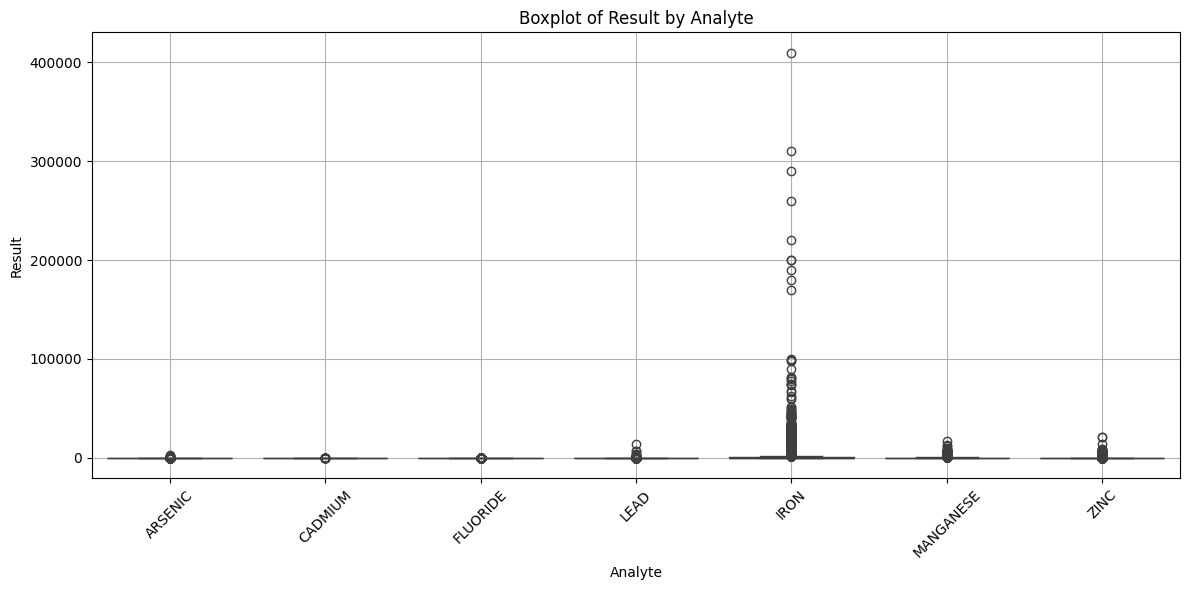

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Analyte Name', y='Result', data=df)
plt.title("Boxplot of Result by Analyte")
plt.xlabel("Analyte")
plt.ylabel("Result")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


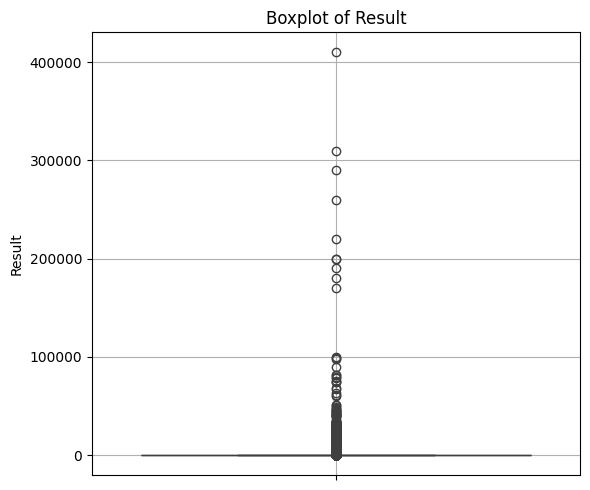

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(y='Result', data=df)
plt.title("Boxplot of Result")
plt.ylabel("Result")
plt.grid(True)
plt.tight_layout()
plt.show()


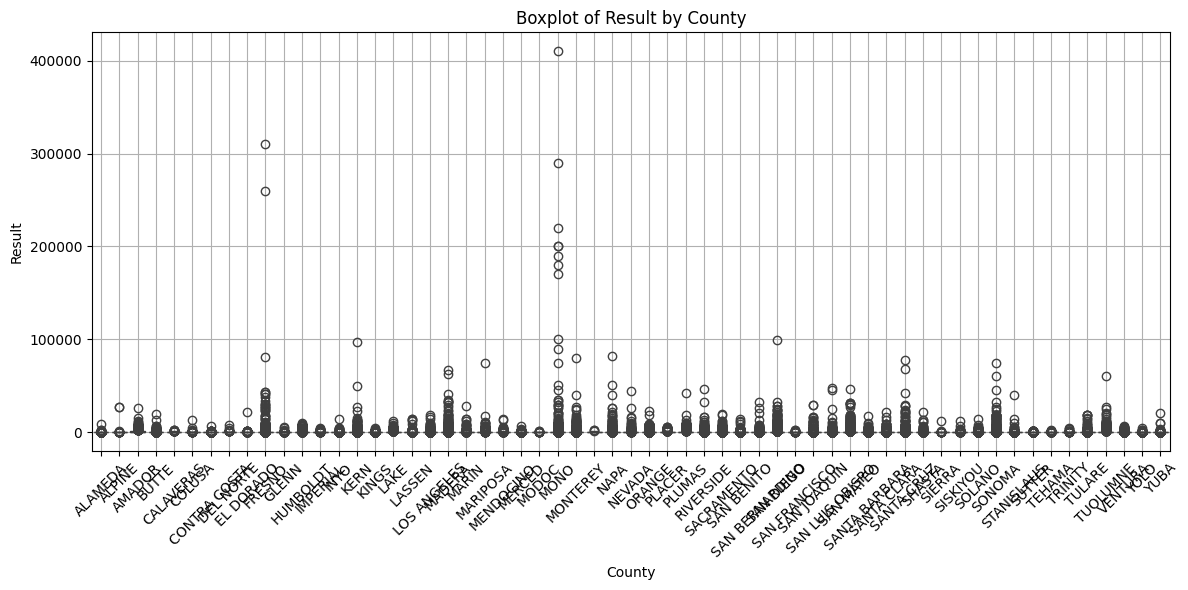

In [6]:
county_col = 'County' if 'County' in df.columns else 'Location'

plt.figure(figsize=(12, 6))
sns.boxplot(x=county_col, y='Result', data=df)
plt.title("Boxplot of Result by County")
plt.xlabel("County")
plt.ylabel("Result")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
df.describe()

Row #  Service Connections  Population TINWSYS  Population R  \
count  638446.000000        630575.000000        6.384460e+05  5.405230e+05   
mean   319223.500000         28072.563145        1.215643e+05  1.431370e+05   
std    184303.629319         85278.018755        4.371998e+05  4.719257e+05   
min         1.000000             0.000000        0.000000e+00  1.000000e+00   
25%    159612.250000            68.000000        2.940000e+02  1.000000e+03   
50%    319223.500000          2683.000000        8.234000e+03  2.050000e+04   
75%    478834.750000         25465.000000        9.462600e+04  1.236790e+05   
max    638446.000000        709623.000000        3.856043e+06  3.856043e+06   

       Population NT   Population T       Latitude      Longitude  \
count   92203.000000   53328.000000  594362.000000  594362.000000   
mean      874.221446    3054.132257      35.869009    -119.465606   
std      3298.473769   10776.303622       1.938450       4.245374   
min         1.000000       1.000000     -33.945009    -124.292950   
25%        40.000000      50.000000      34.108500    -121.315556   
50%       105.000000     150.000000      35.500230    -119.222799   
75%       348.000000     717.000000      37.523673    -118.009177   
max     41686.000000  141700.000000      41.985415     122.277488   

       Lab ELAP Cert ID   Analyte Code  Reporting Level         Result  \
count     638446.000000  638446.000000    387614.000000  254149.000000   
mean        1712.374072    1027.131161        20.509650     176.018003   
std          709.871311      20.095390        31.537251    1958.147200   
min         1055.000000    1005.000000         0.000000       0.000370   
25%         1180.000000    1015.000000         1.000000       2.000000   
50%         1531.000000    1028.000000         5.000000       6.800000   
75%         2385.000000    1032.000000        20.000000      45.000000   
max         9437.000000    1095.000000      1200.000000  410000.000000   

       Radiological Count Error            MCL        TRIGGER  
count                       0.0  638446.000000  638446.000000  
mean                        NaN     368.181763     369.982385  
std                         NaN    1185.126204    1184.576706  
min                         NaN       0.000000       2.000000  
25%                         NaN       2.000000       5.000000  
50%                         NaN      10.000000      15.000000  
75%                         NaN      50.000000      50.000000  
max                         NaN    5000.000000    5000.000000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638446 entries, 0 to 638445
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Row #                     638446 non-null  int64  
 1   Regulating Agency         638446 non-null  object 
 2   Water System #            638446 non-null  object 
 3   System                    638446 non-null  object 
 4   Status                    638446 non-null  object 
 5   County                    638446 non-null  object 
 6   Service Connections       630575 non-null  float64
 7   Population TINWSYS        638446 non-null  int64  
 8   Population R              540523 non-null  float64
 9   Population NT             92203 non-null   float64
 10  Population T              53328 non-null   float64
 11  FED Type                  638446 non-null  object 
 12  Facility ID               638446 non-null  object 
 13  Facility Name             638446 non-null  o

In [9]:
print("Data shape:", df.shape)
print(df.head())

print("\nColumn Data Types:")
print(df.dtypes)

Data shape: (638446, 57)
   Row #            Regulating Agency Water System #  \
0      1  DISTRICT 04 - SAN FRANCISCO      CA0103040   
1      2  DISTRICT 04 - SAN FRANCISCO      CA0103040   
2      3  DISTRICT 04 - SAN FRANCISCO      CA0103040   
3      4  DISTRICT 04 - SAN FRANCISCO      CA0103040   
4      5  DISTRICT 04 - SAN FRANCISCO      CA0103040   

                               System Status   County  Service Connections  \
0  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
1  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
2  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
3  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   
4  NORRIS CANYON PROPERTY OWNERS ASSN      A  ALAMEDA                 19.0   

   Population TINWSYS  Population R  Population NT  ...  \
0                  50          50.0            NaN  ...   
1                  50          50.0            NaN 

In [10]:
print("Summary Statistics:")
print(df.describe(include='all'))

print("\nMissing values per column:")
print(df.isna().sum())

if 'Analyte' in df.columns:
    print("\nNumber of unique analytes:", df['Analyte'].nunique())
    print("Analyte categories:", df['Analyte'].unique()[:10], "...")
if 'Location' in df.columns or 'Station' in df.columns:
    loc_col = 'Location' if 'Location' in df.columns else 'Station'
    print("\nNumber of unique locations:", df[loc_col].nunique())
    print("Location examples:", df[loc_col].unique()[:5], "...")


Summary Statistics:
                Row #        Regulating Agency Water System #  \
count   638446.000000                   638446         638446   
unique            NaN                       54           5068   
top               NaN  DISTRICT 19 - TEHACHAPI      CA1510031   
freq              NaN                    46044          13599   
mean    319223.500000                      NaN            NaN   
std     184303.629319                      NaN            NaN   
min          1.000000                      NaN            NaN   
25%     159612.250000                      NaN            NaN   
50%     319223.500000                      NaN            NaN   
75%     478834.750000                      NaN            NaN   
max     638446.000000                      NaN            NaN   

                      System  Status       County  Service Connections  \
count                 638446  638446       638446        630575.000000   
unique                  5063       3           59  

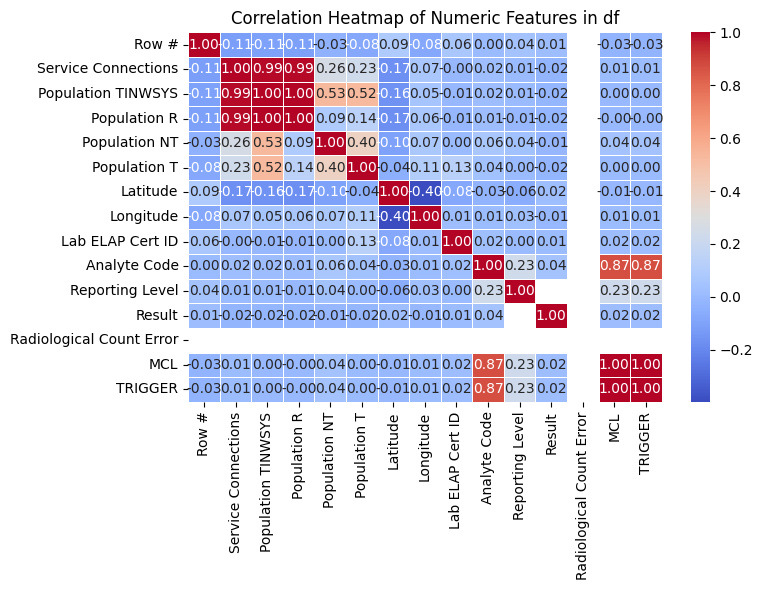

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features in df")
plt.tight_layout()
plt.show()


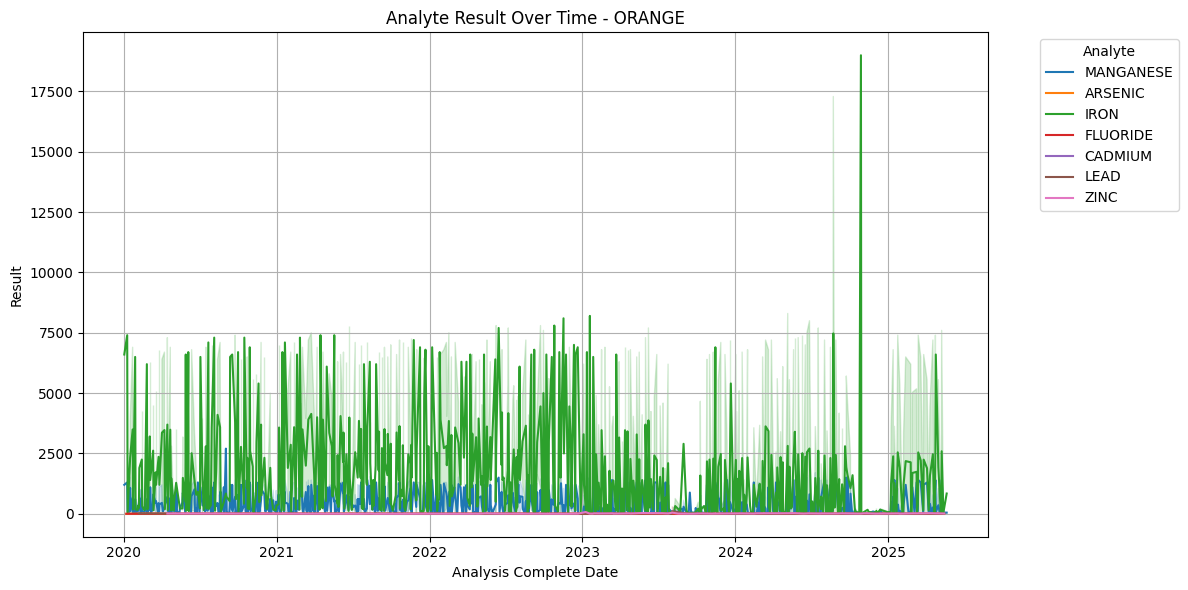

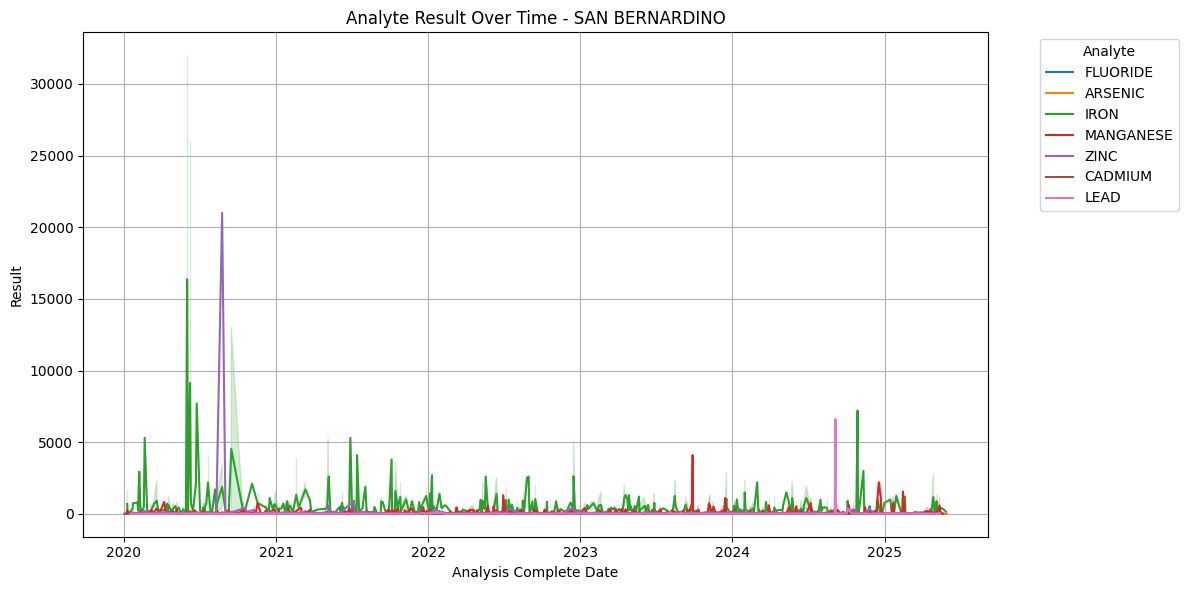

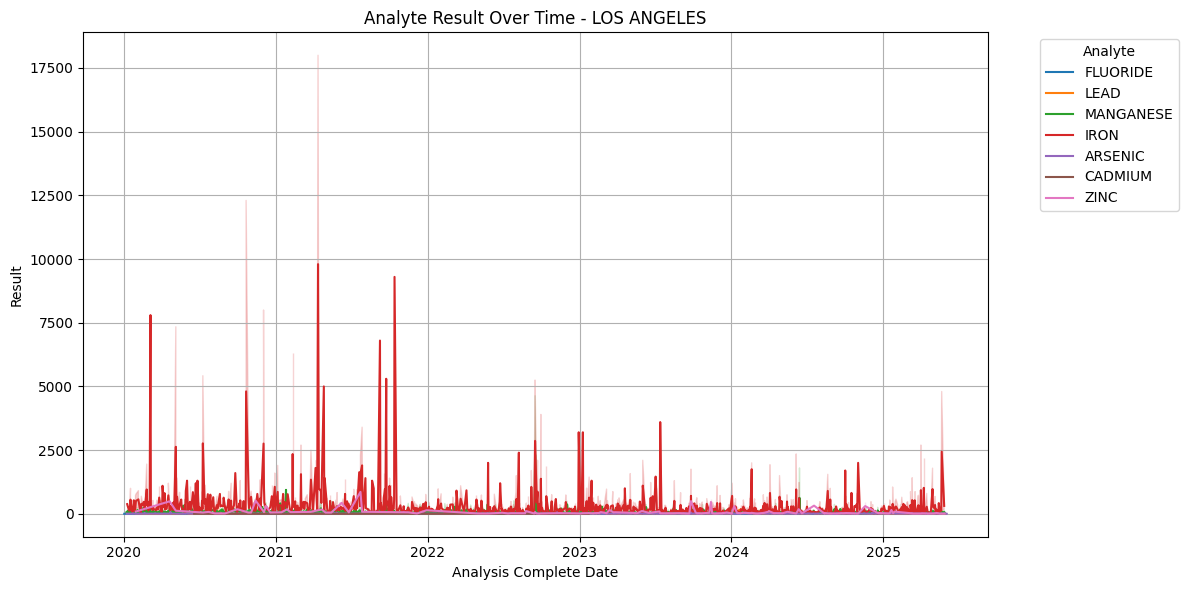

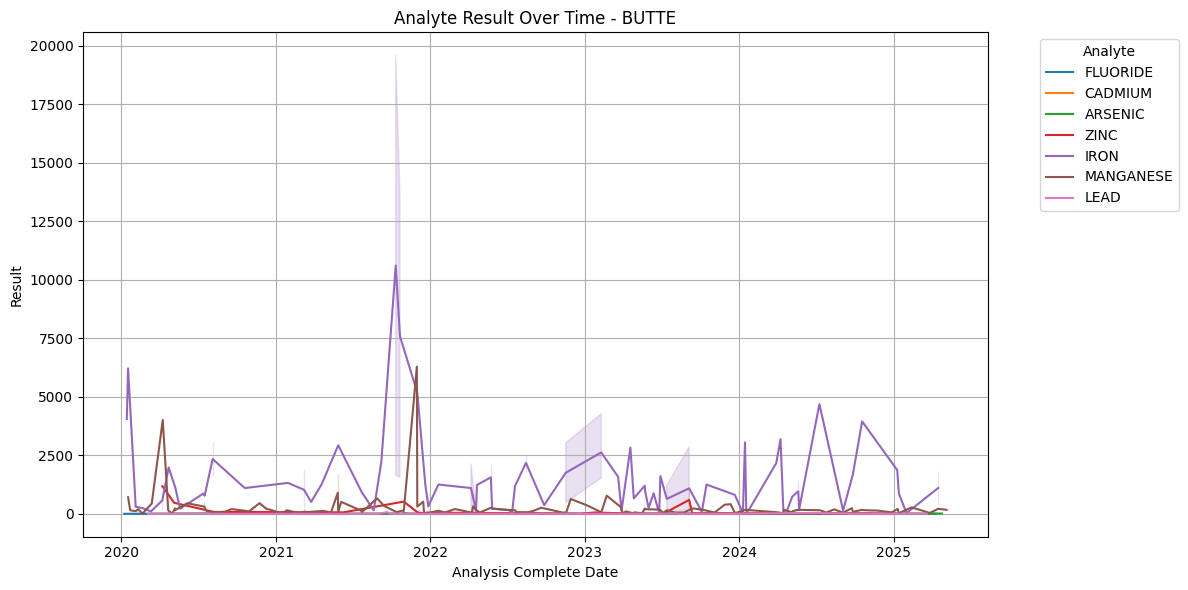

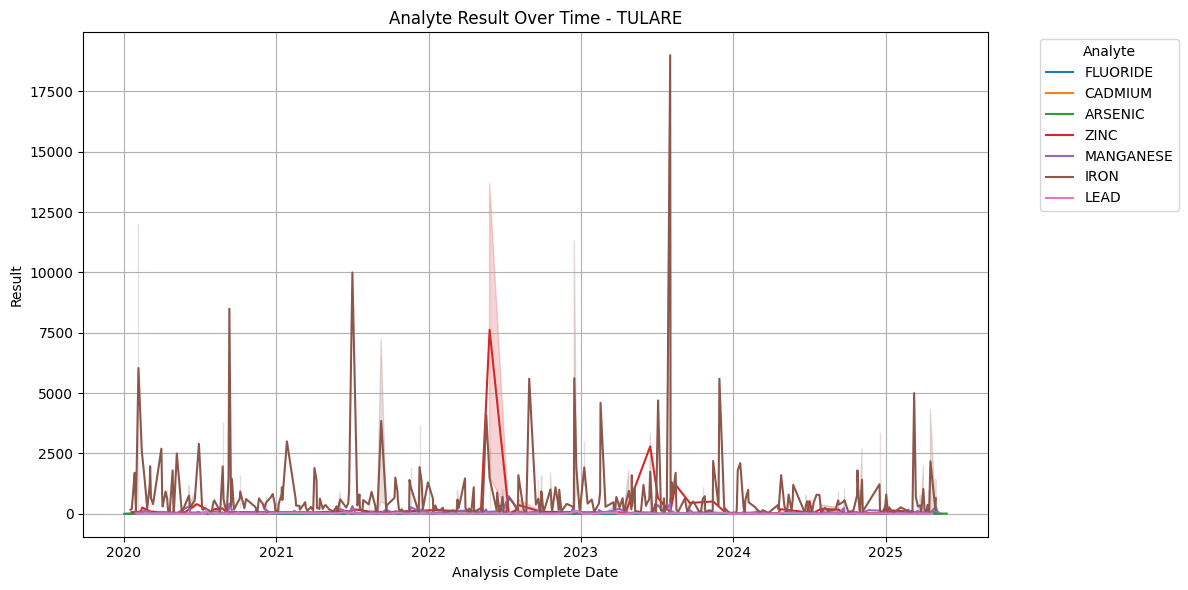

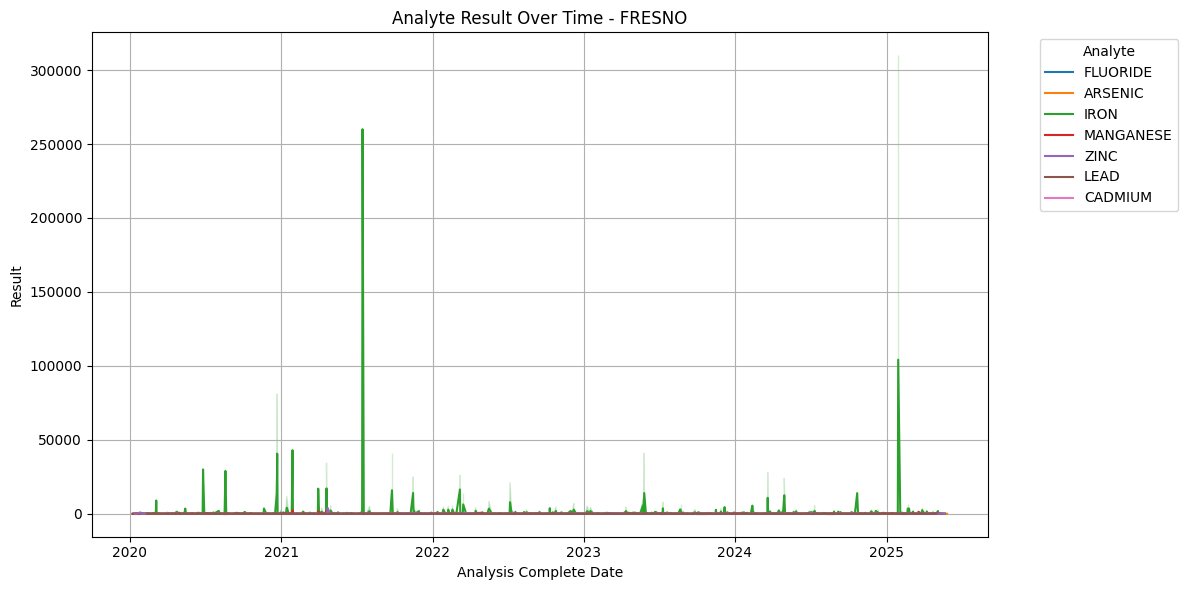

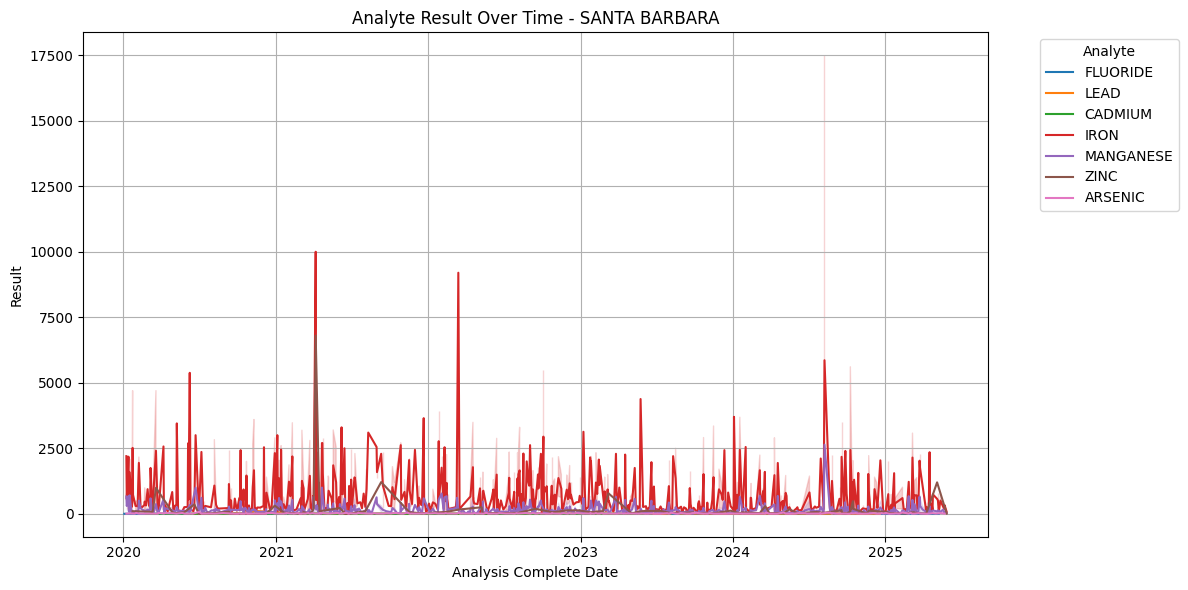

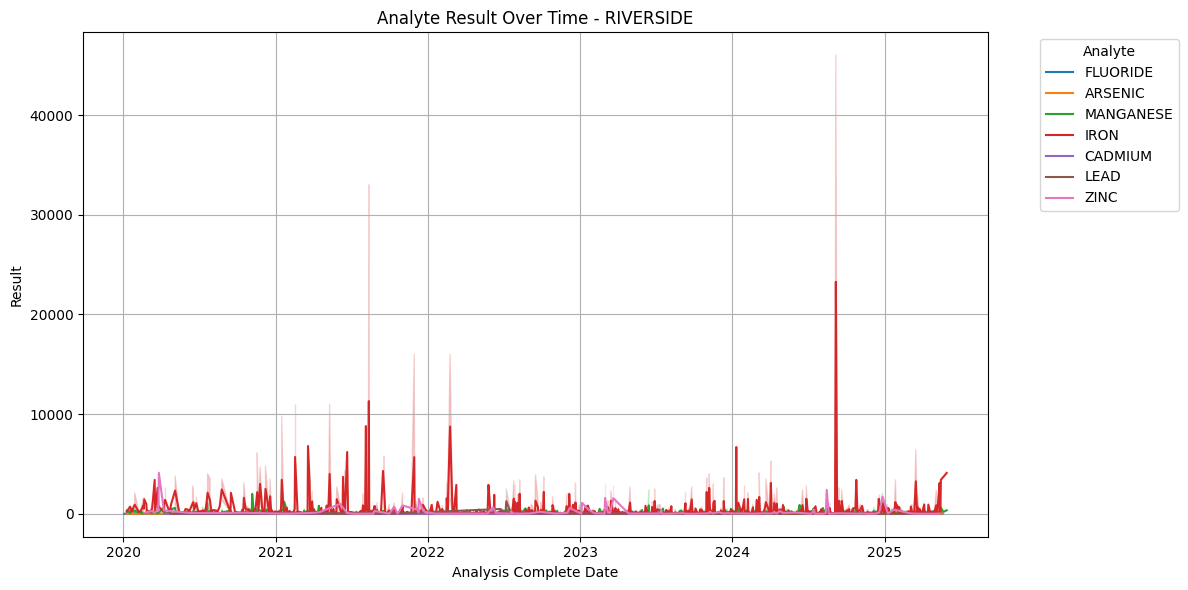

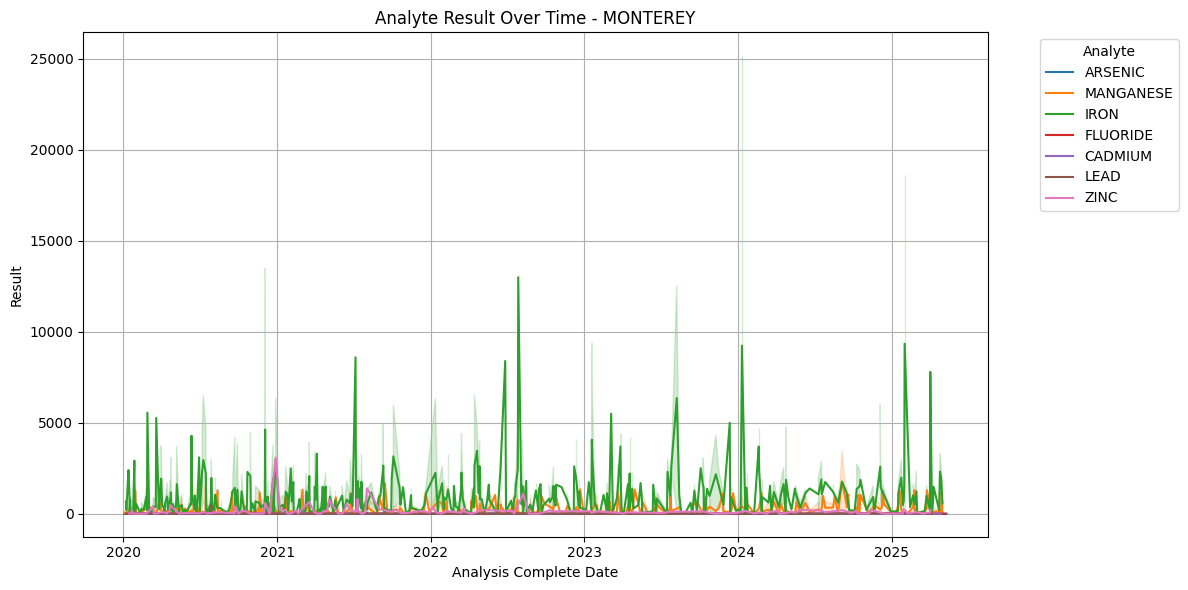

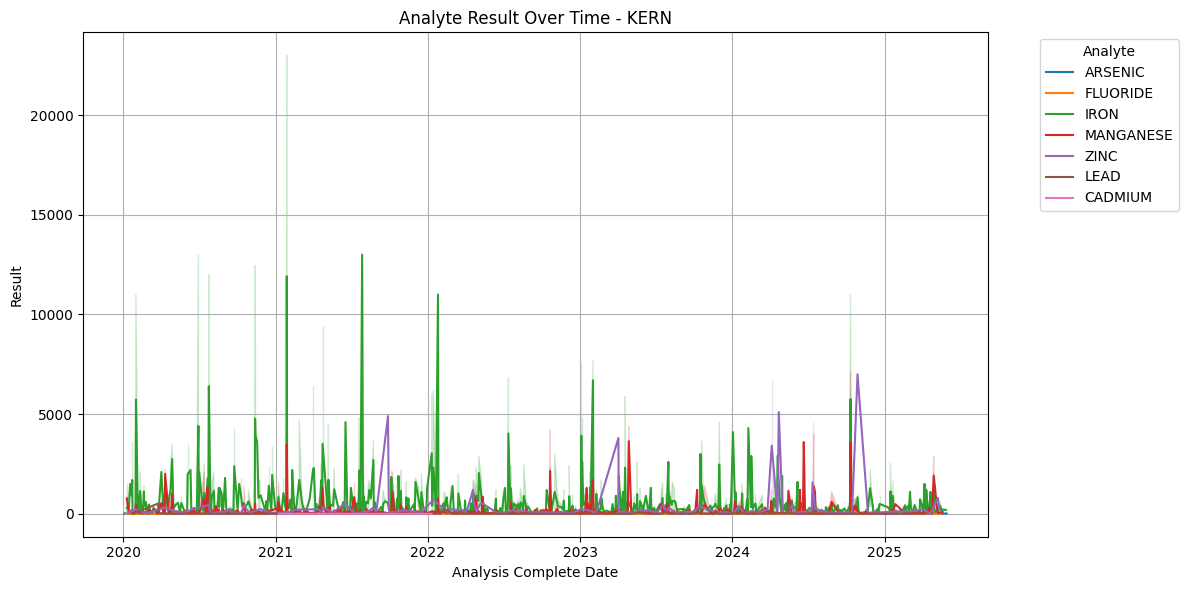

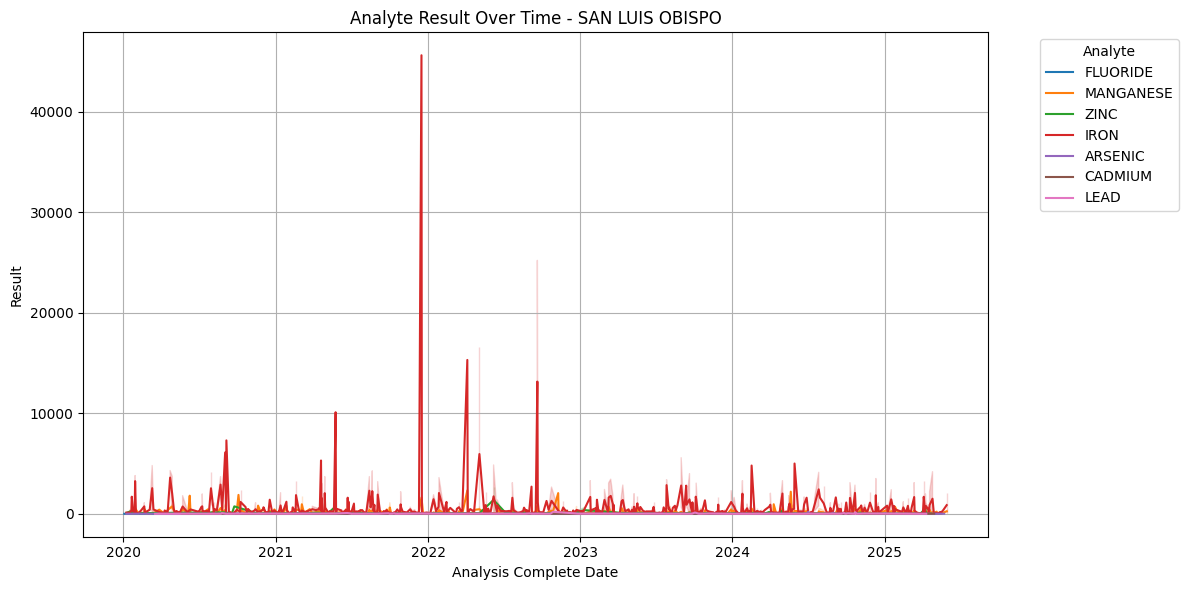

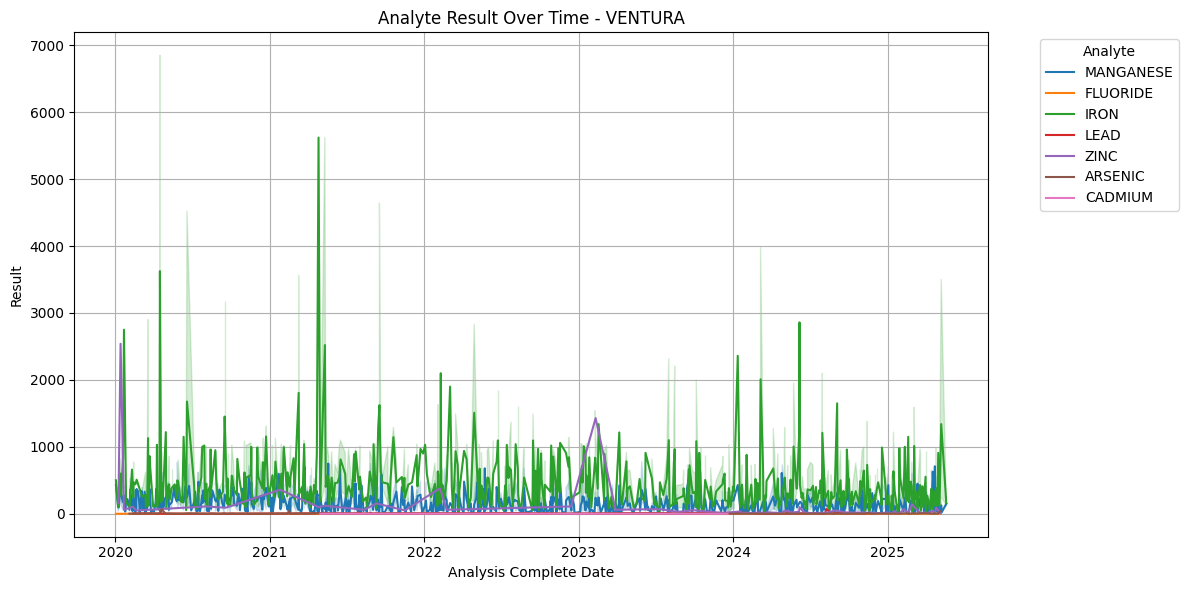

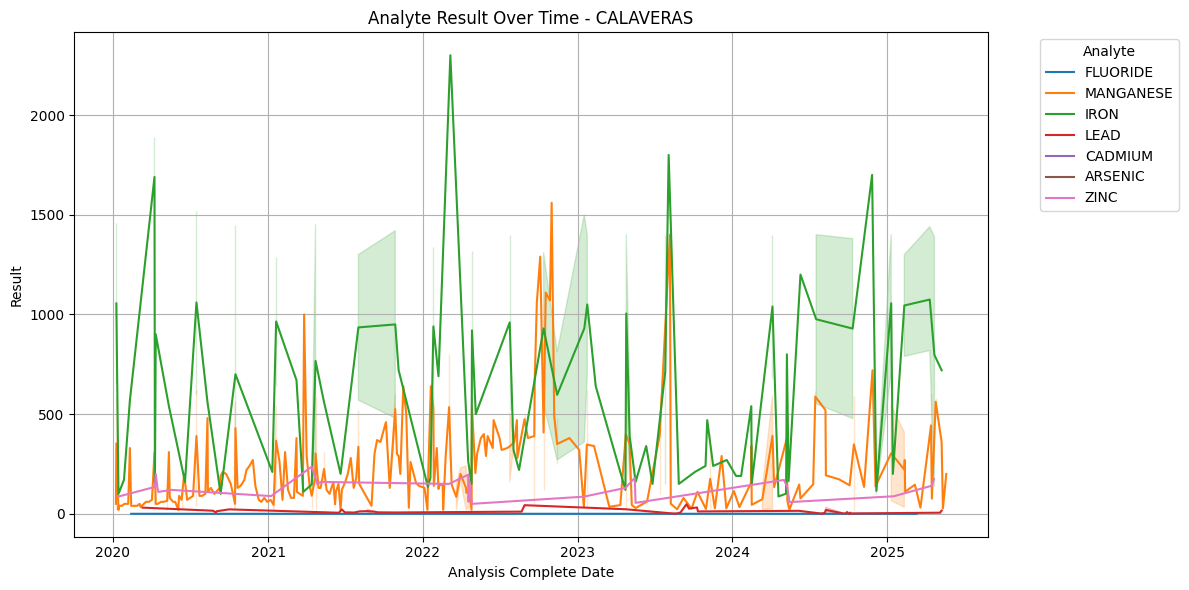

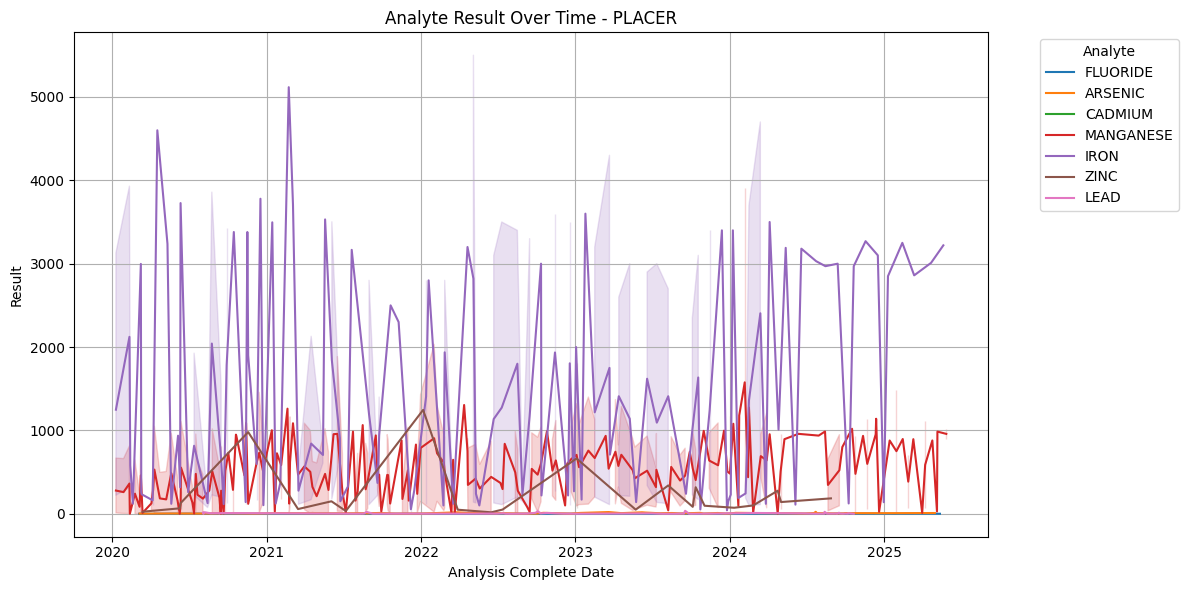

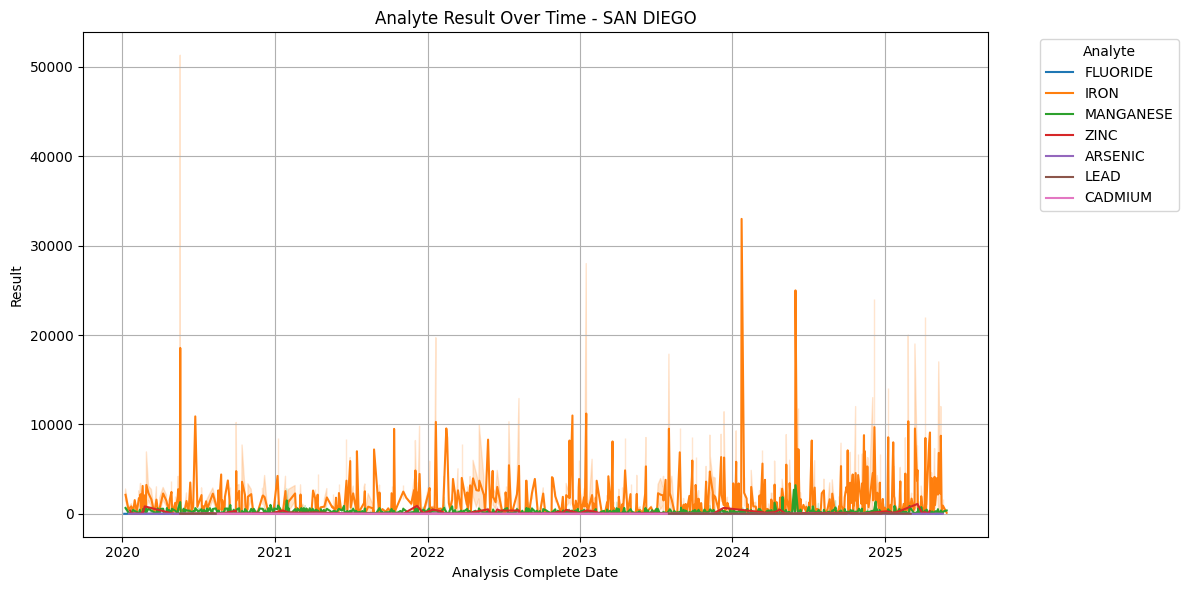

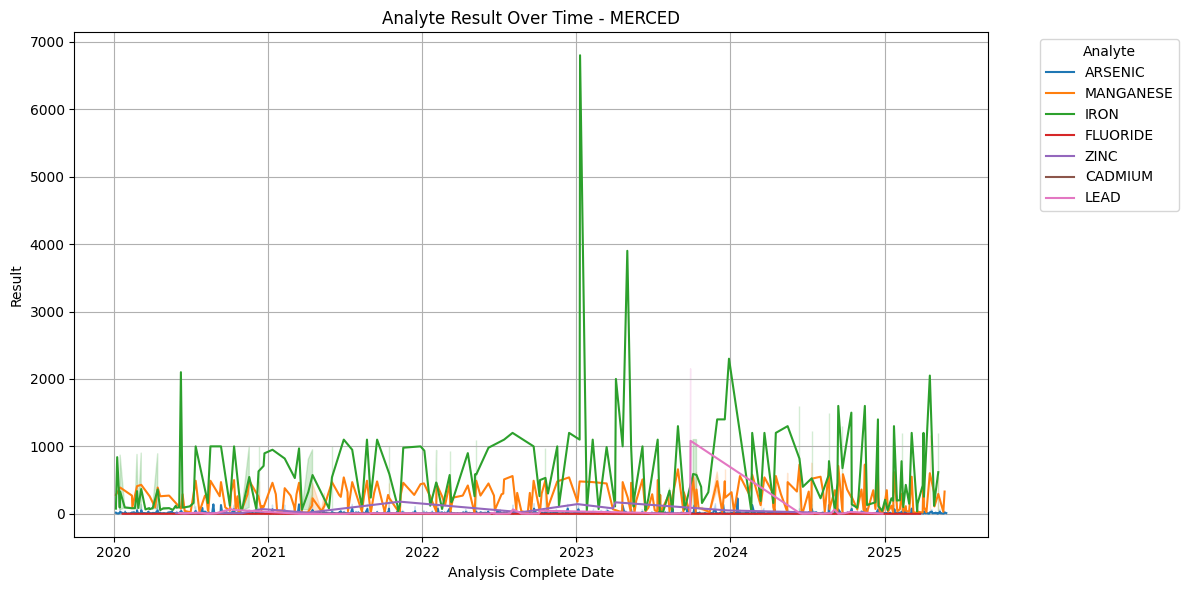

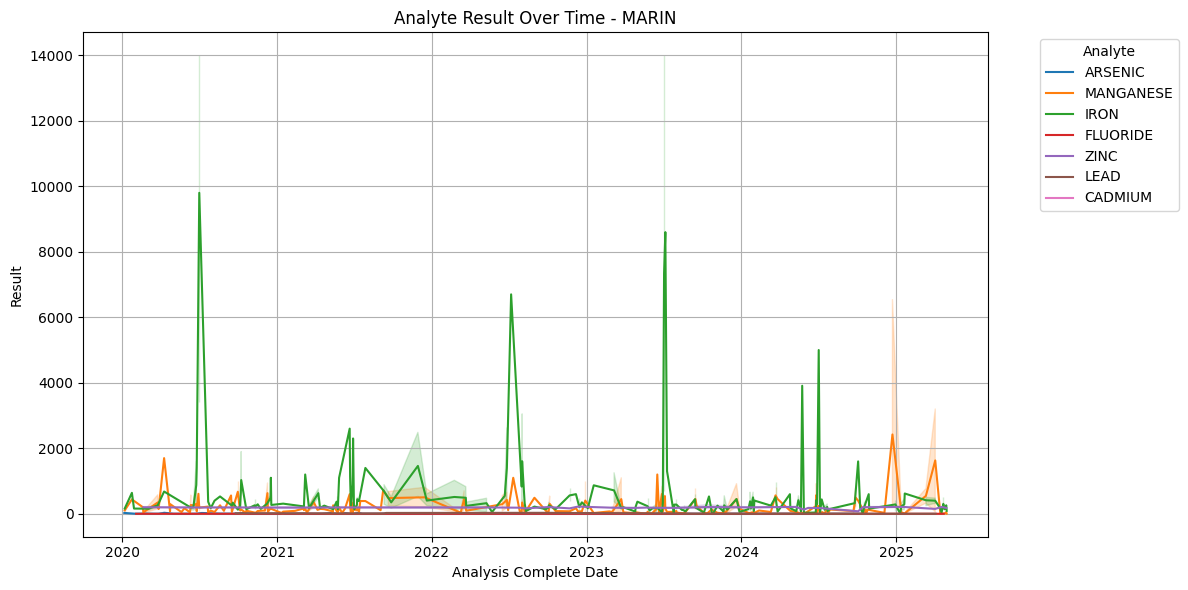

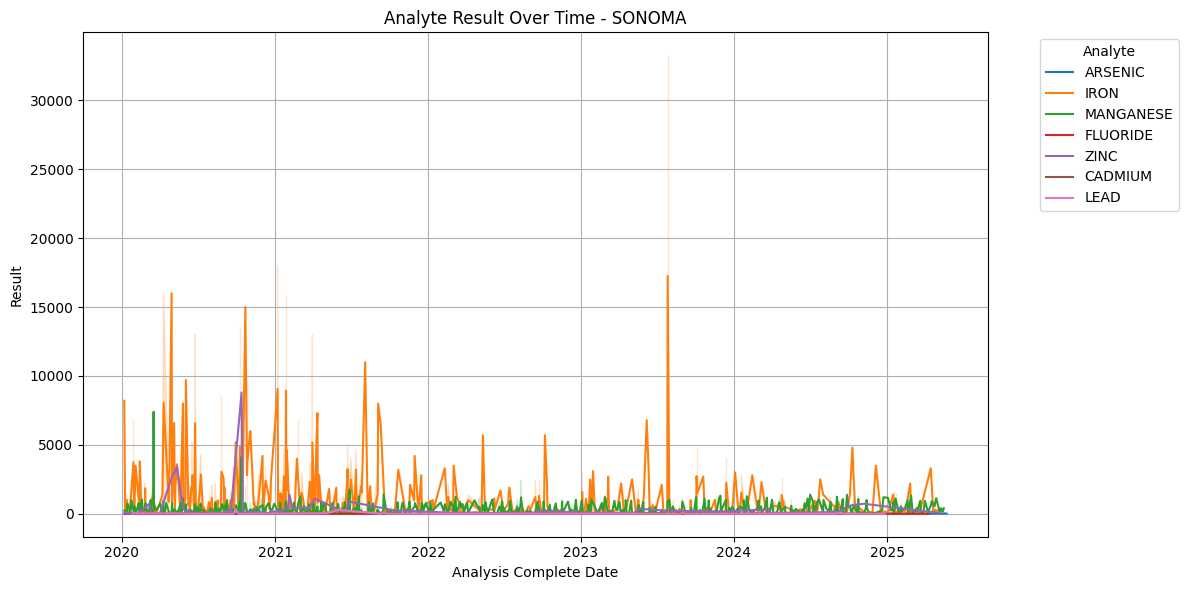

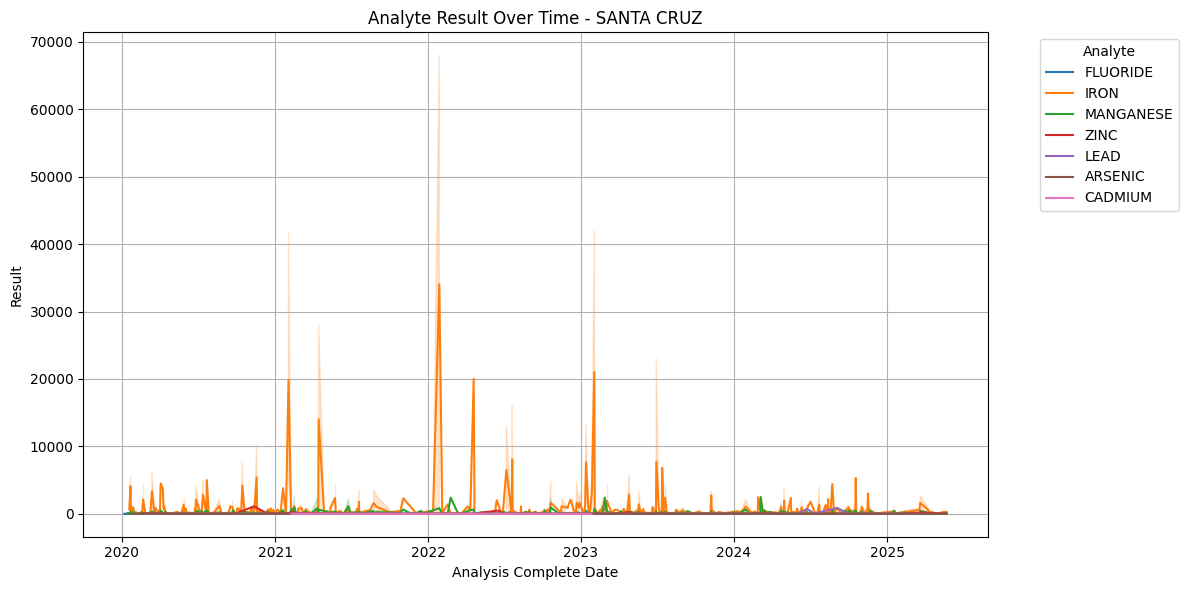

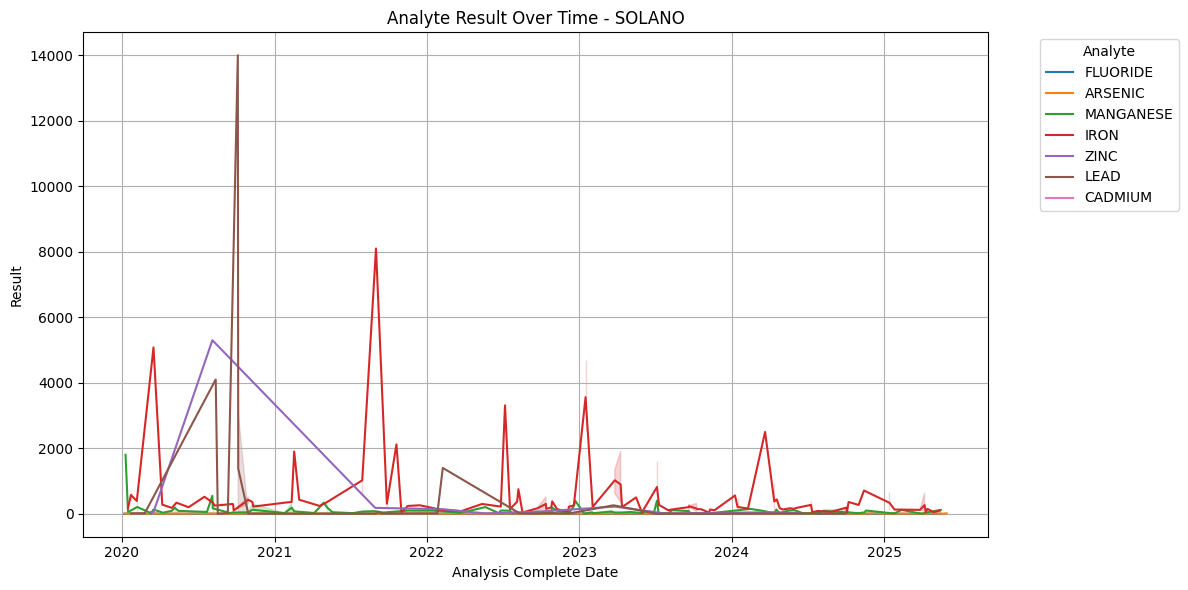

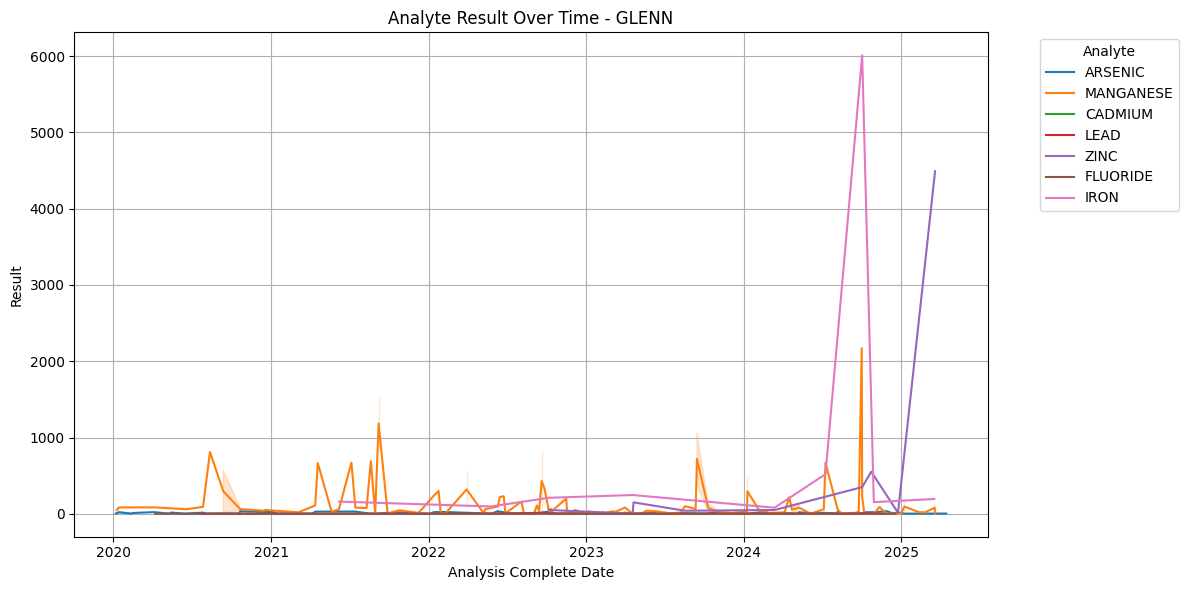

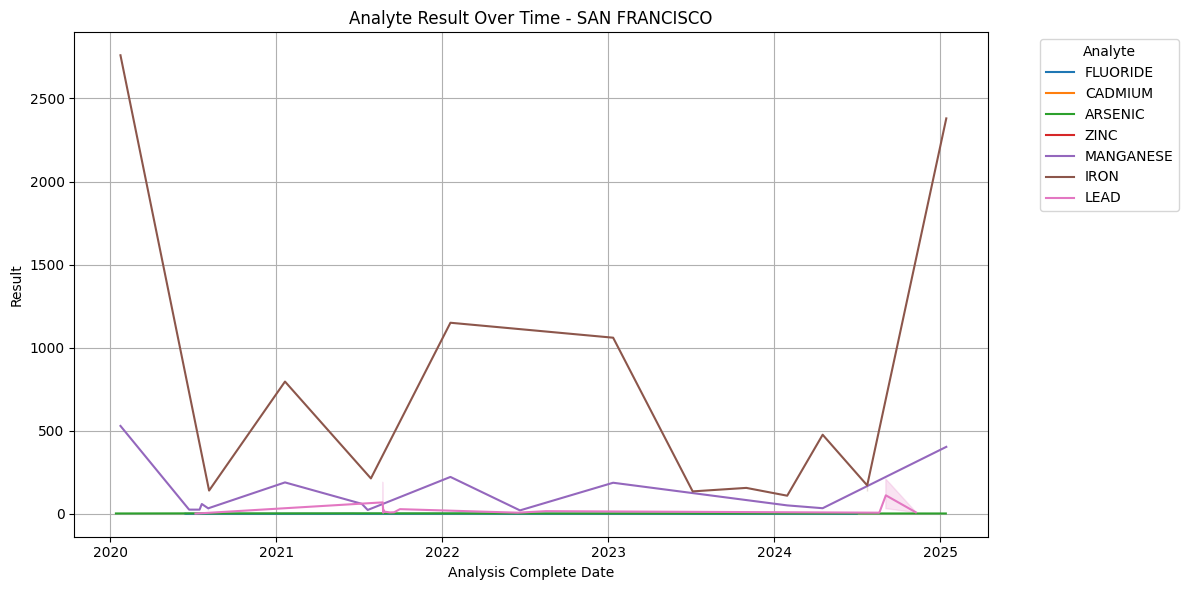

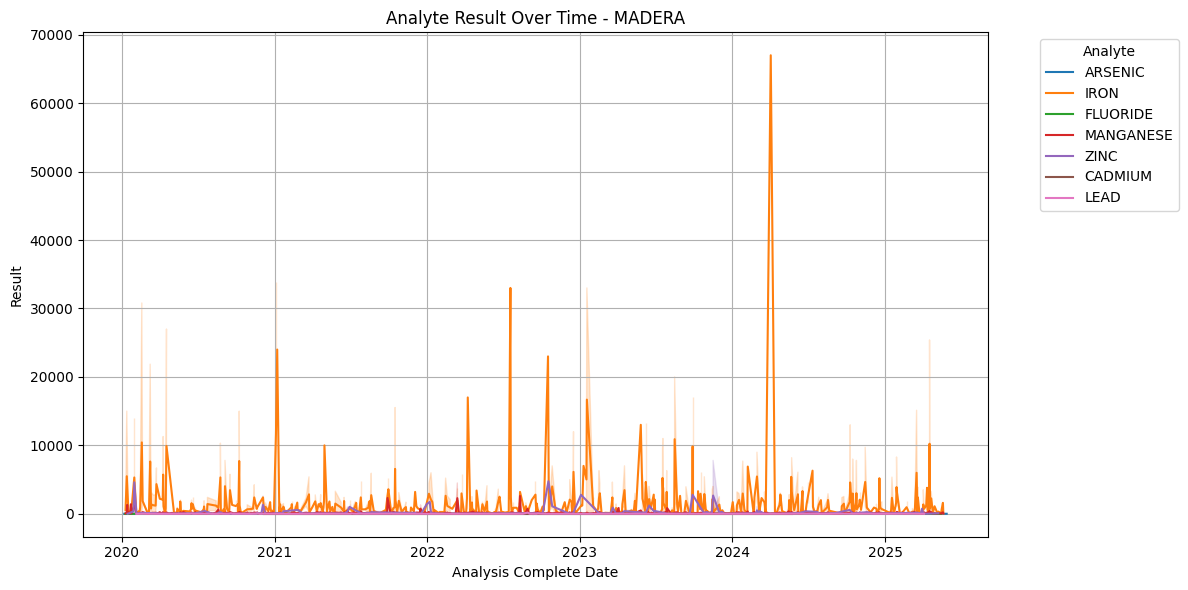

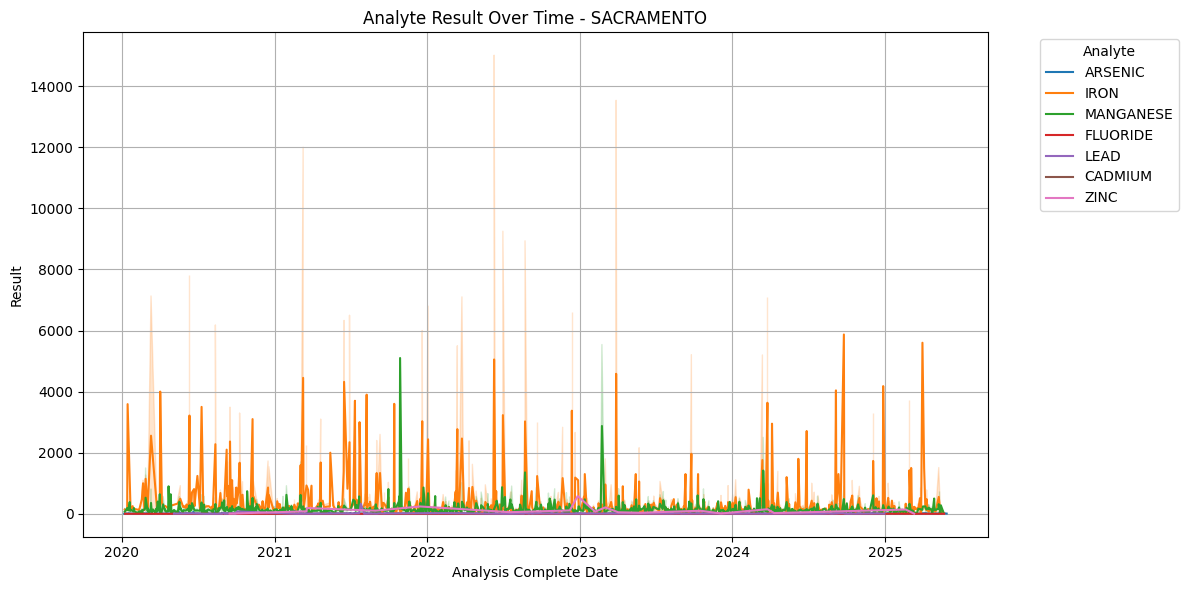

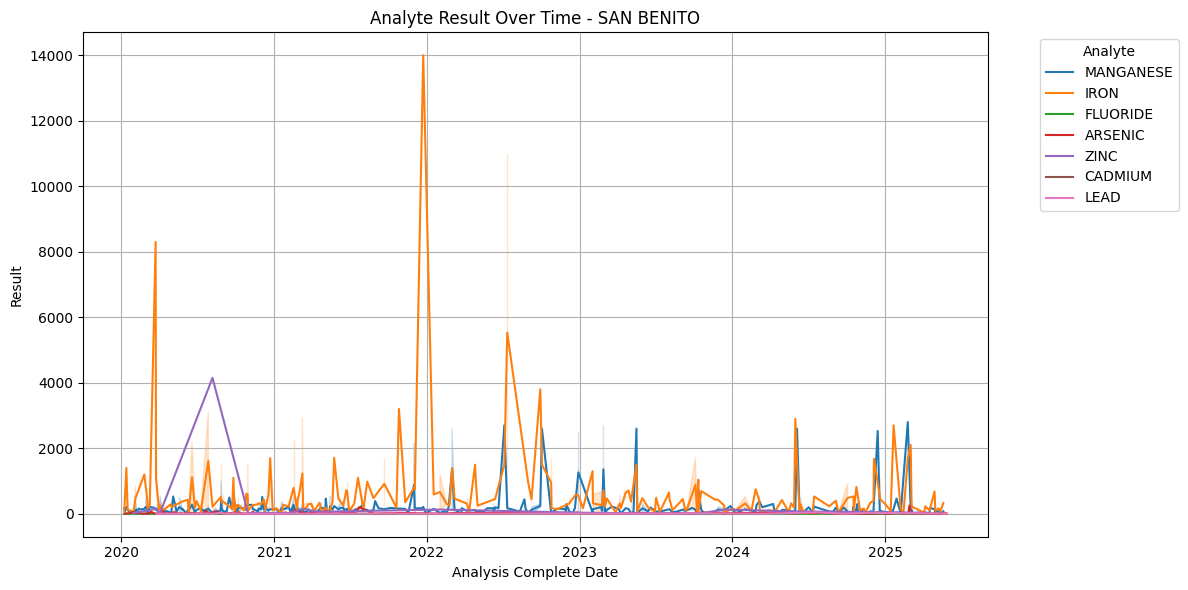

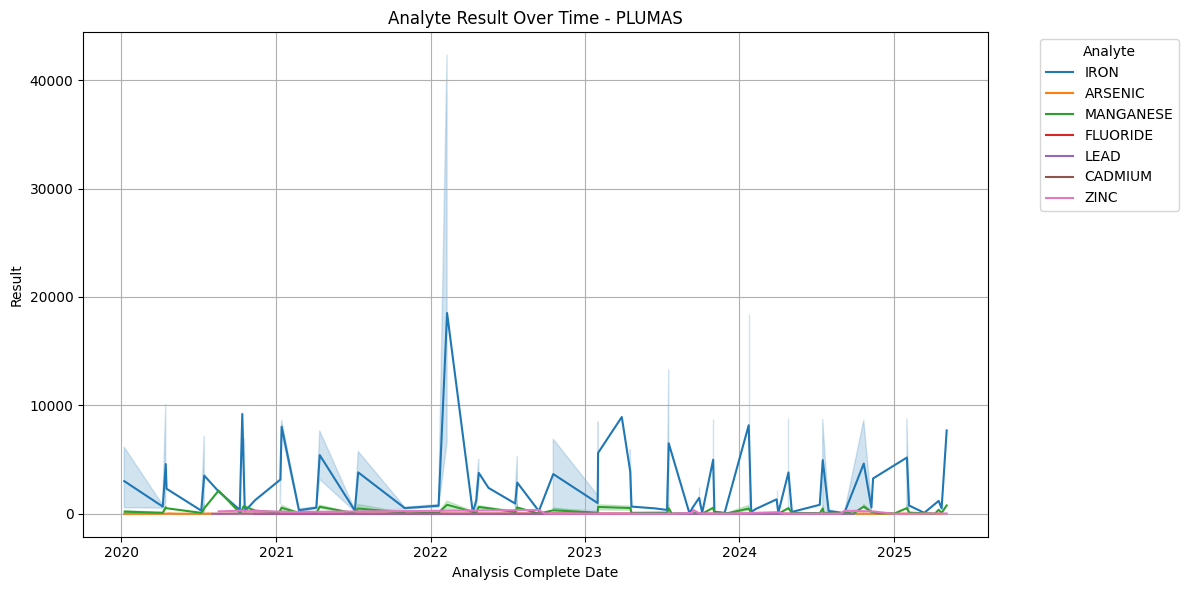

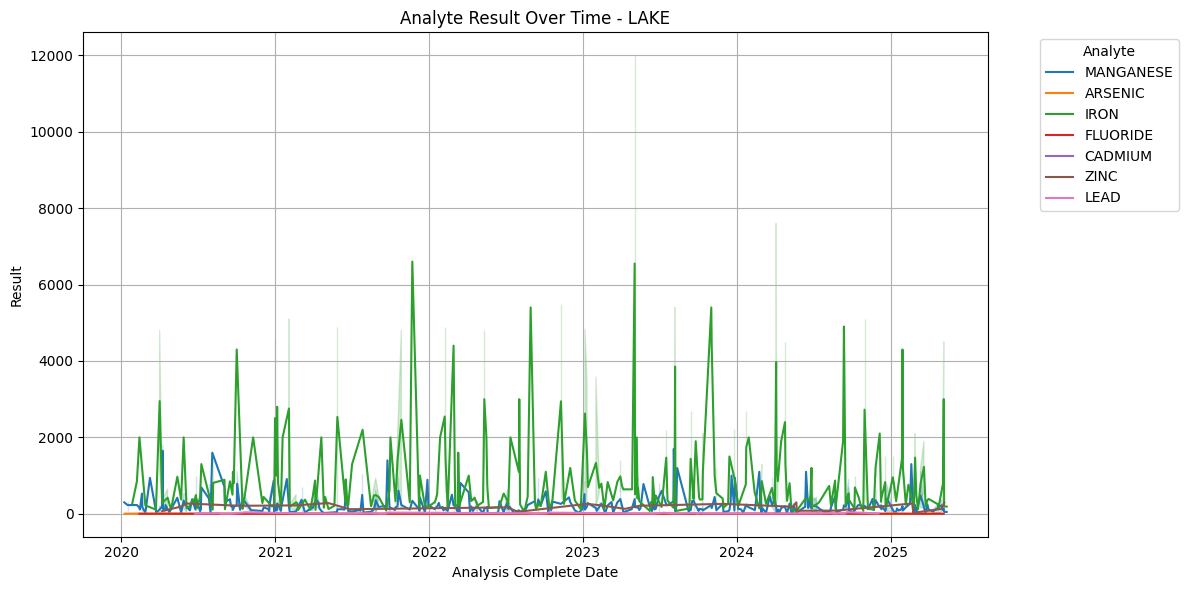

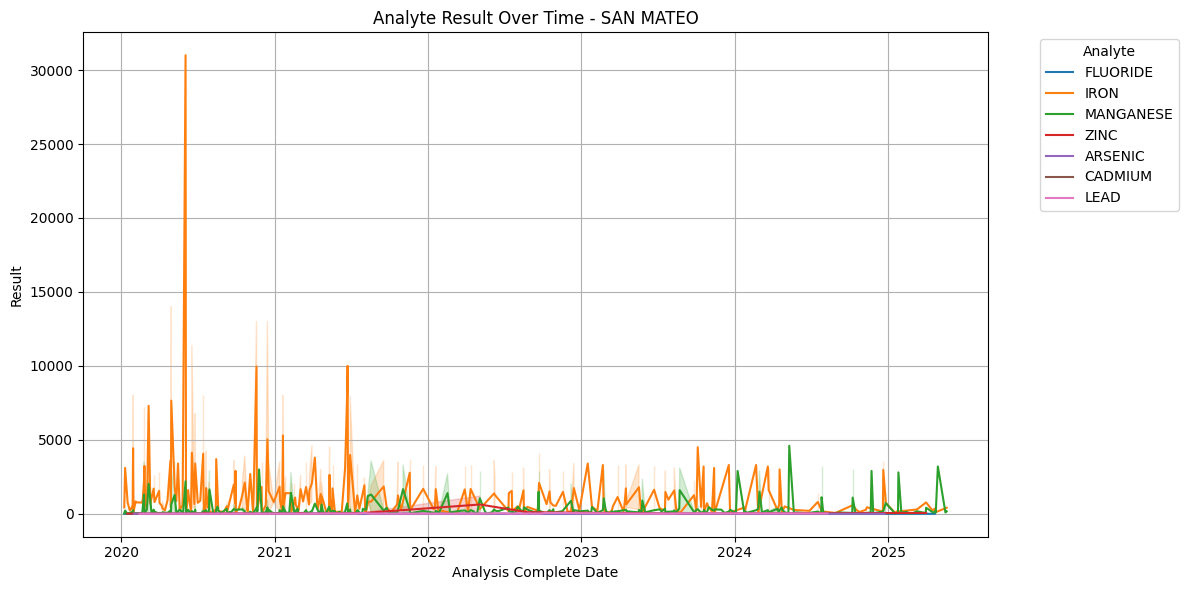

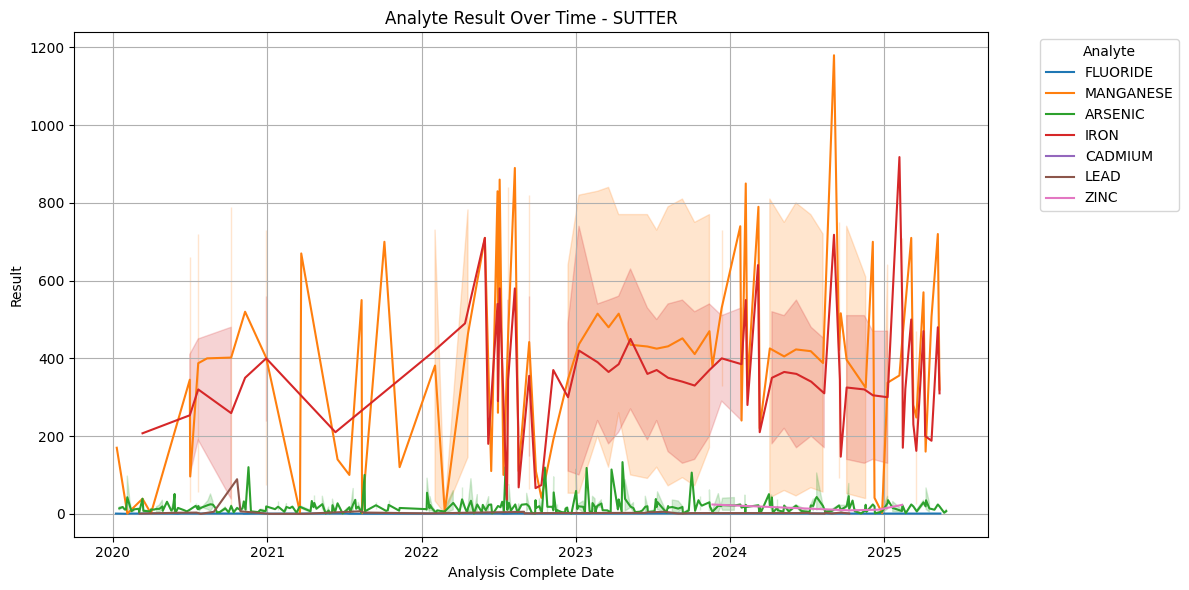

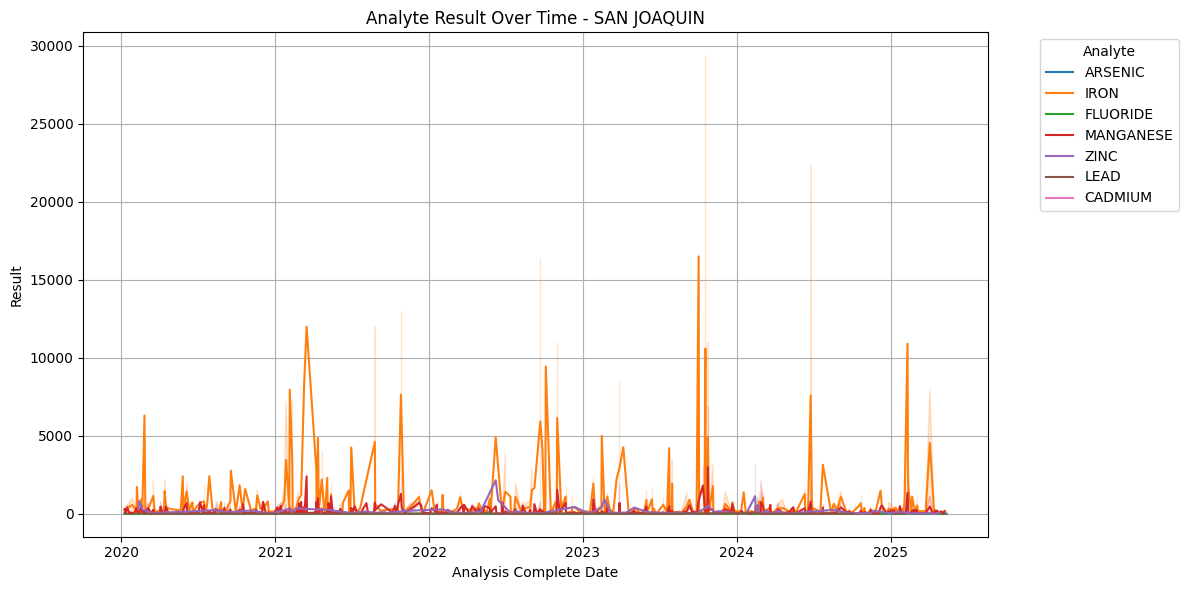

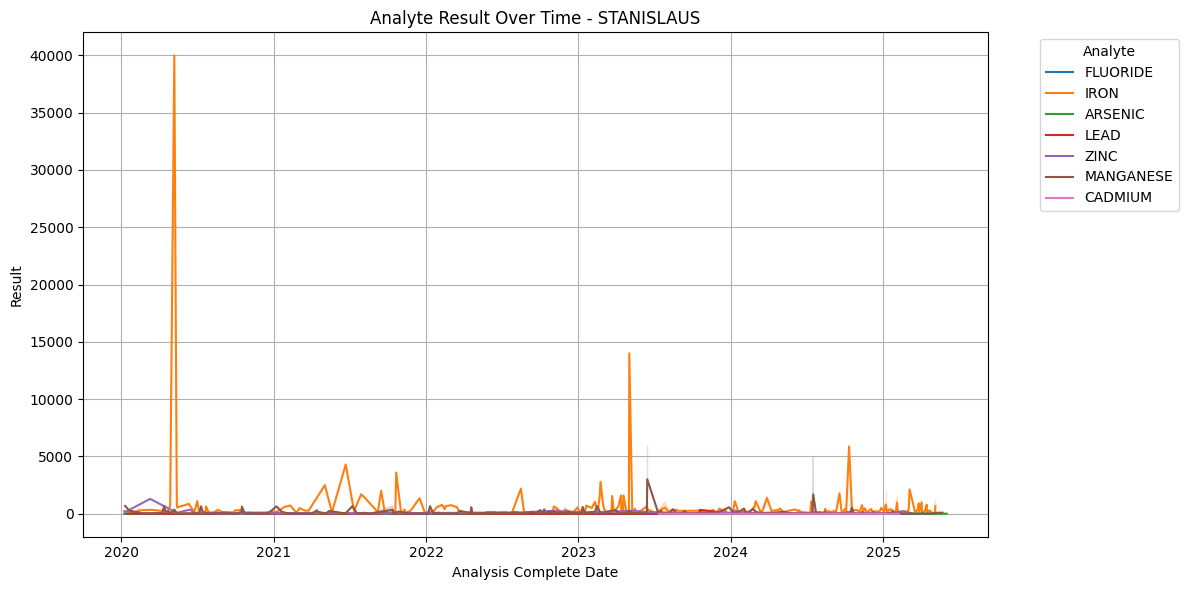

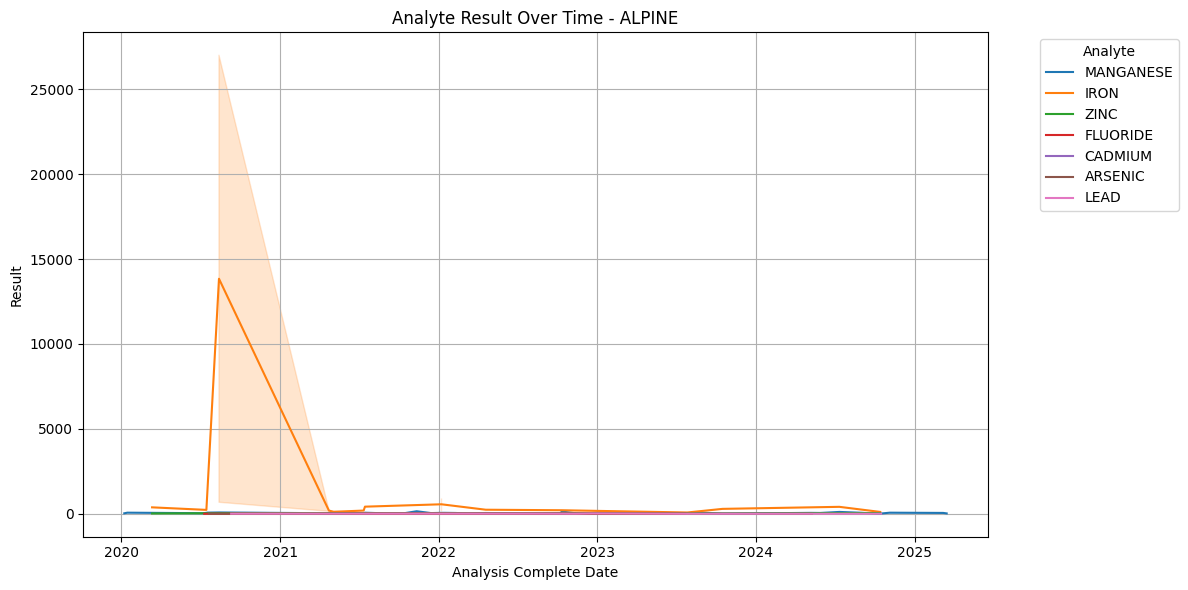

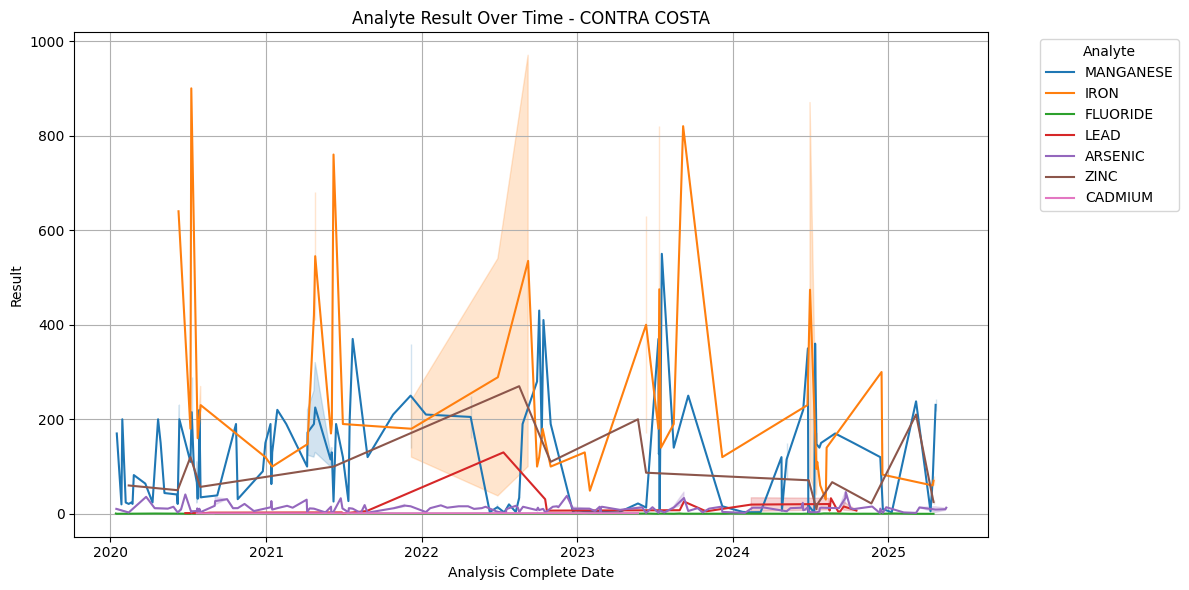

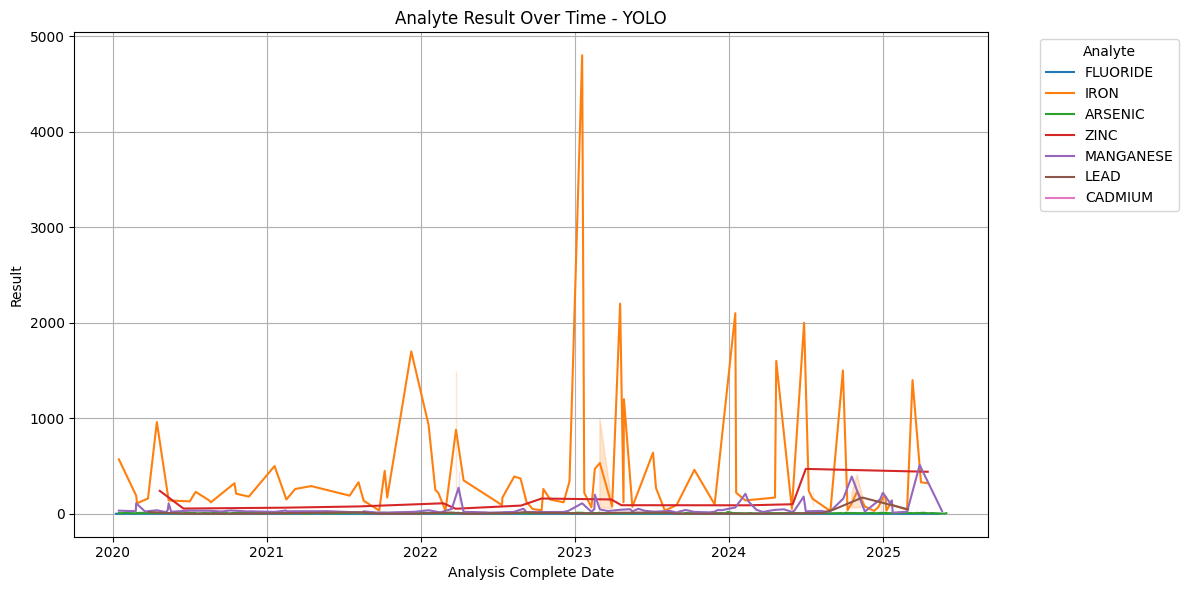

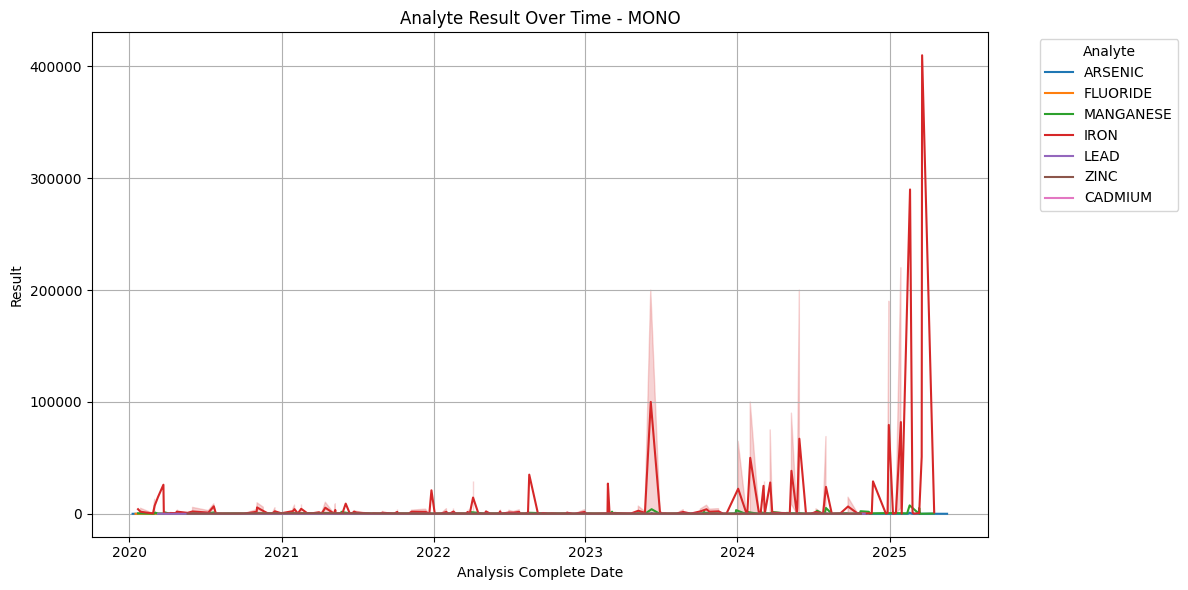

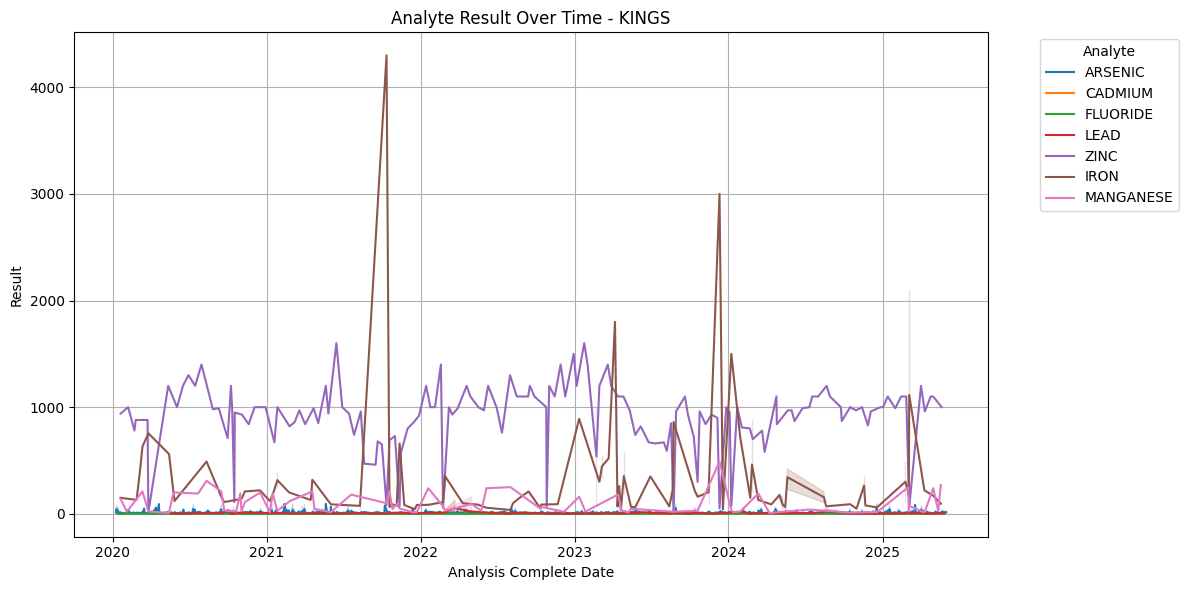

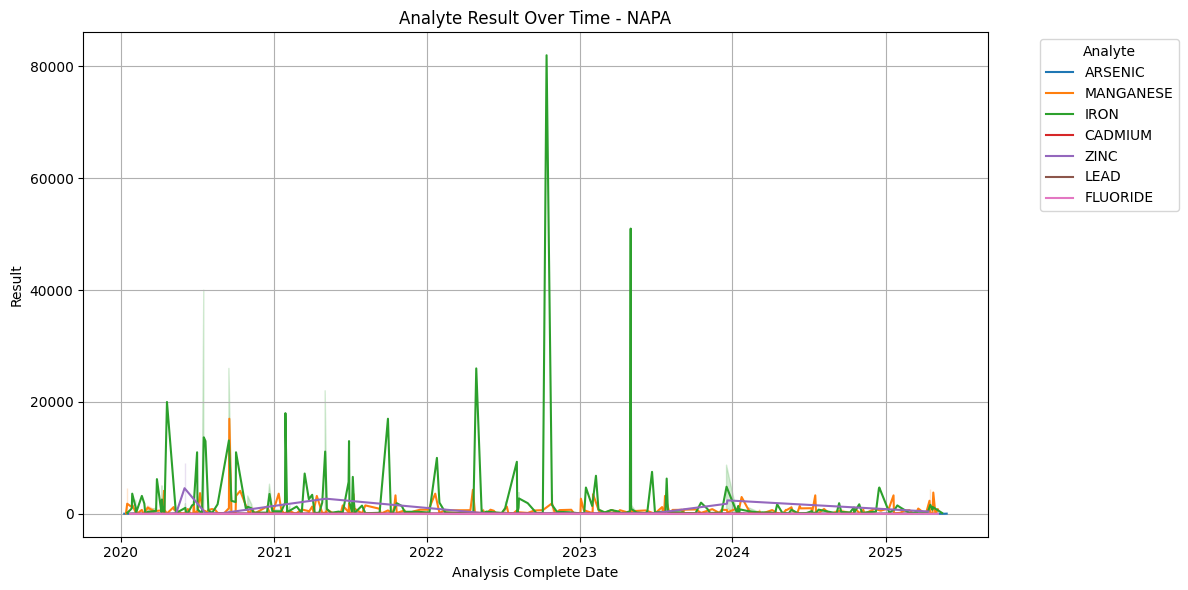

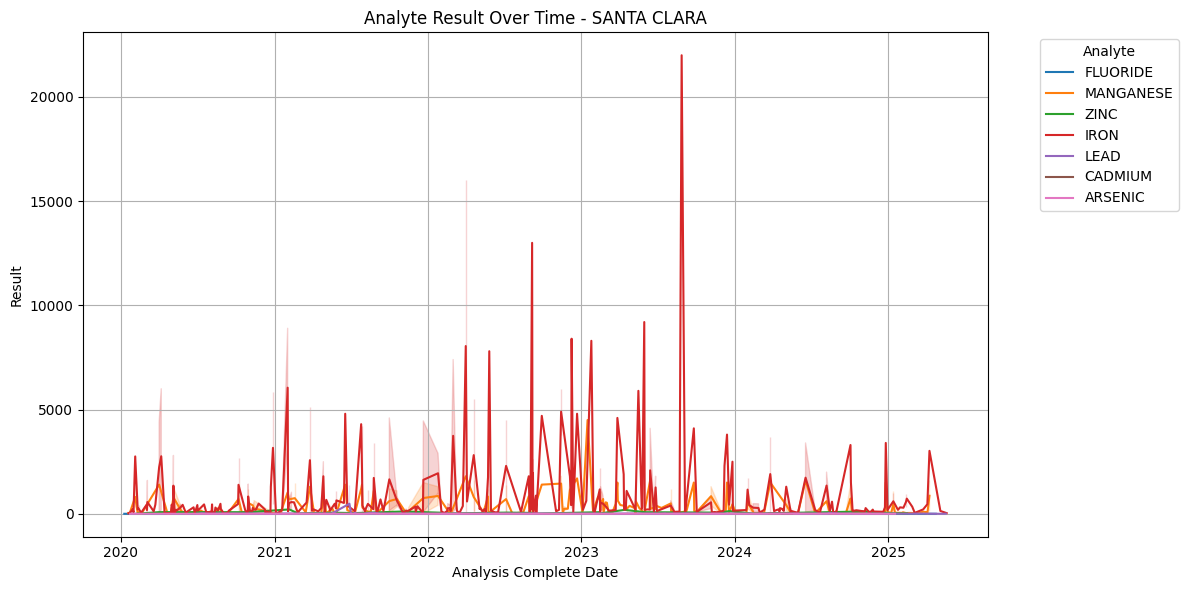

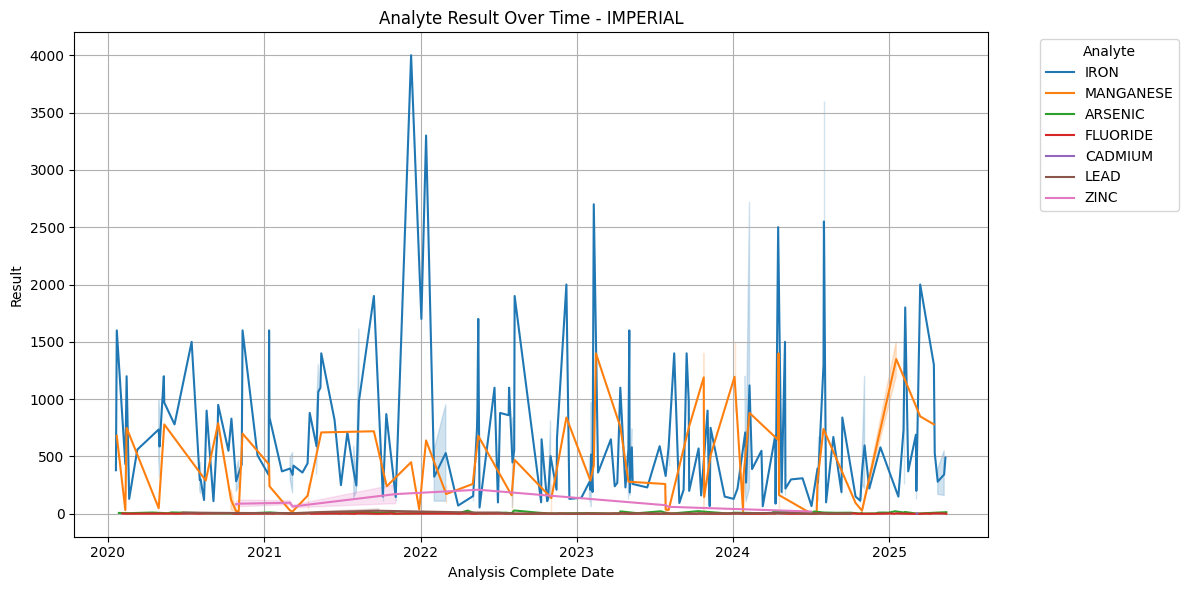

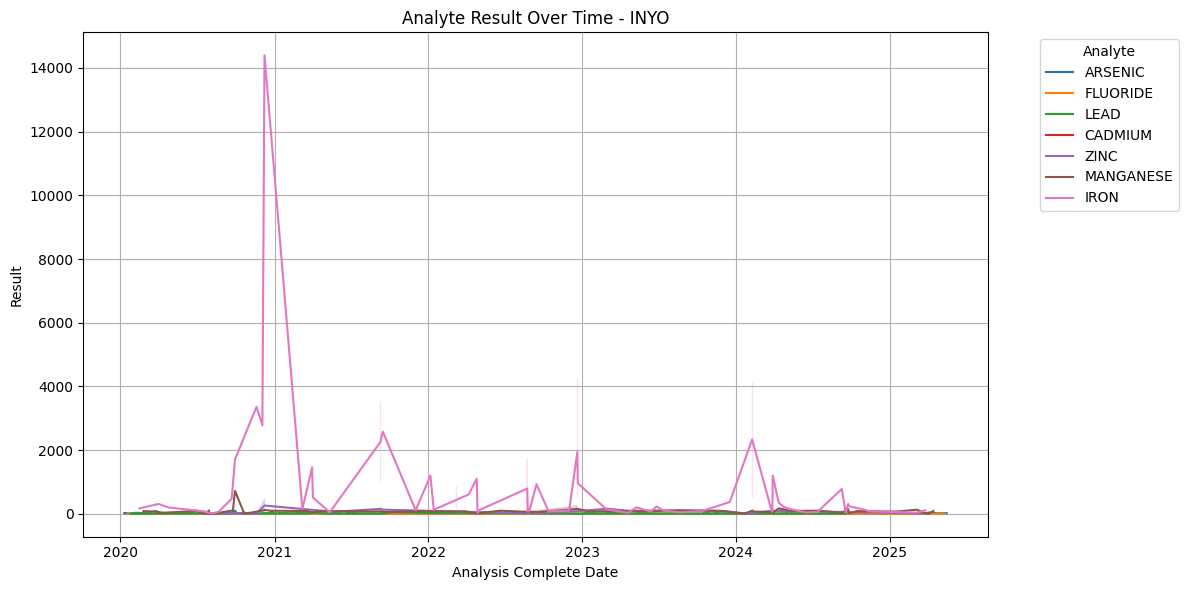

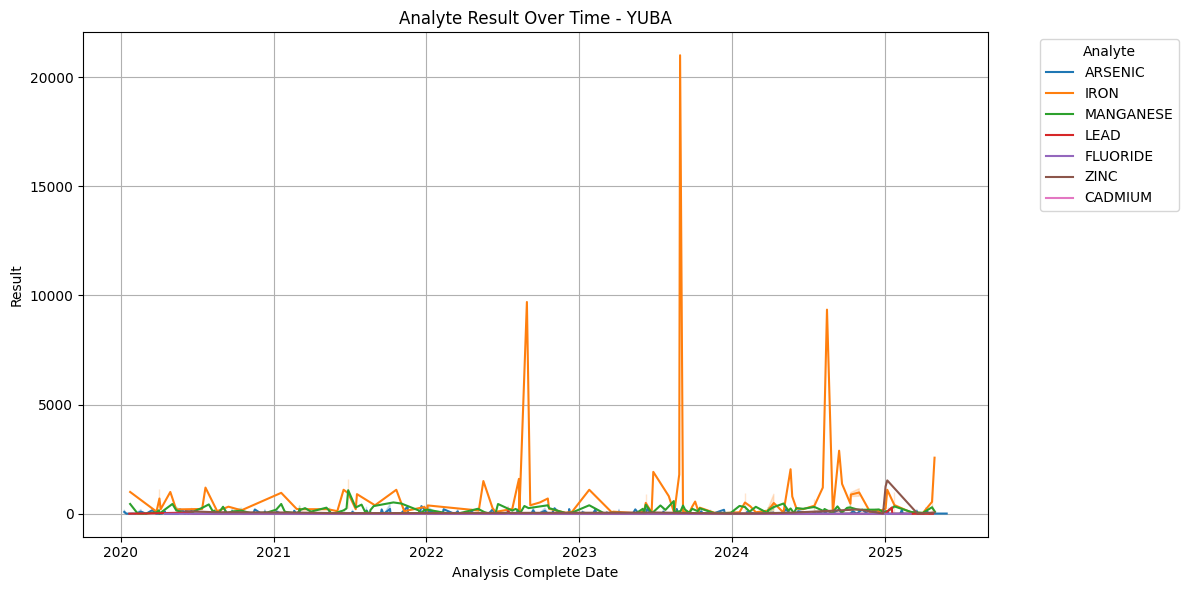

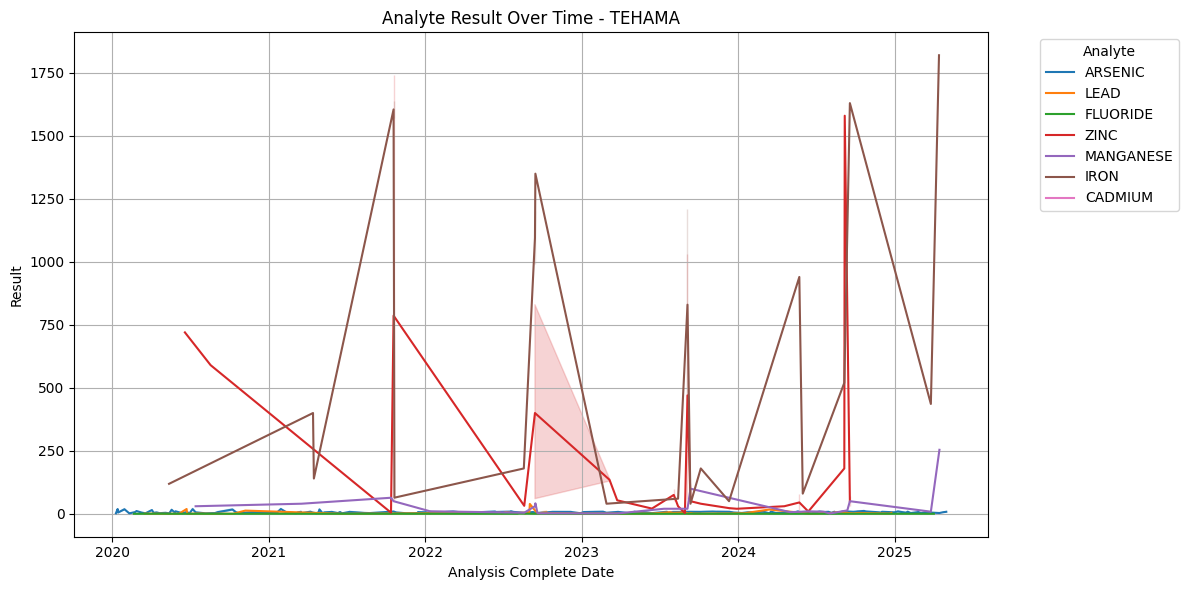

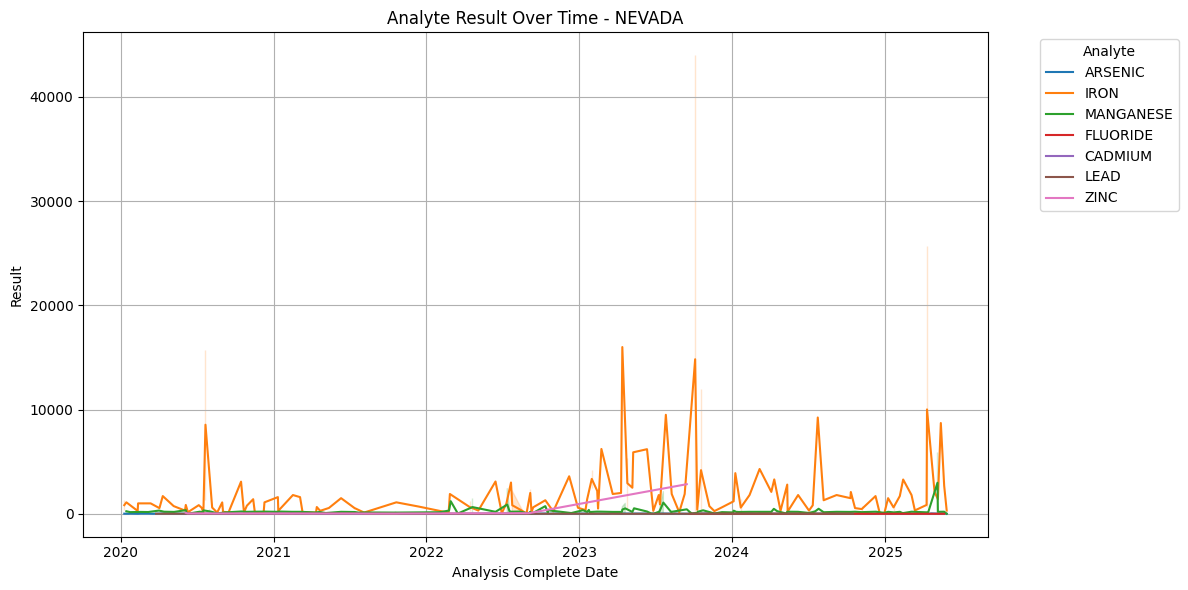

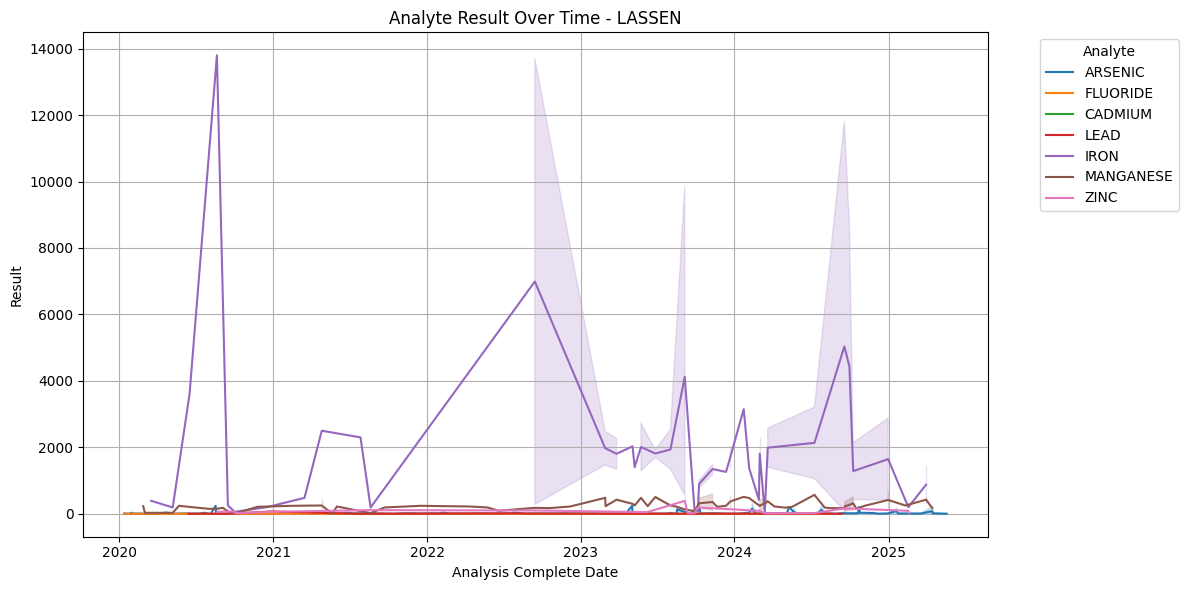

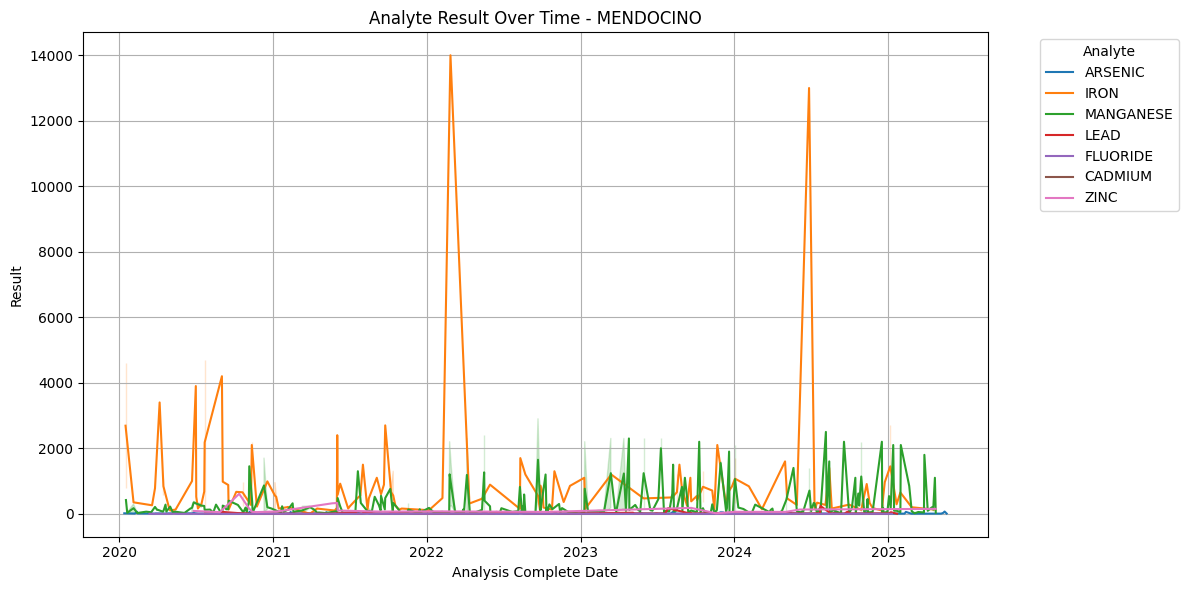

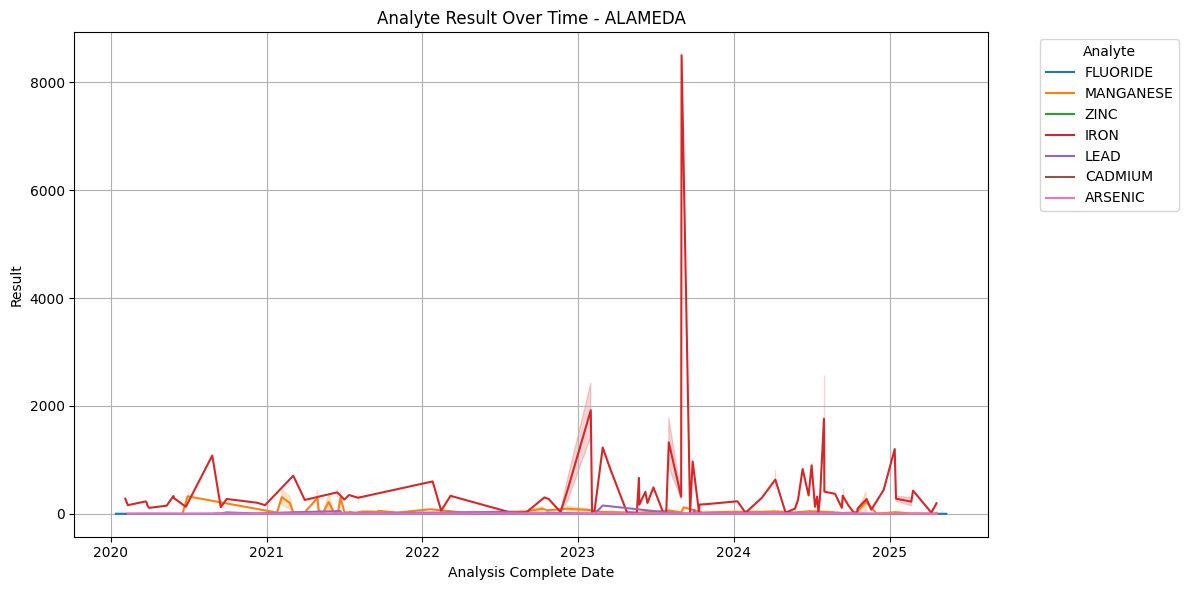

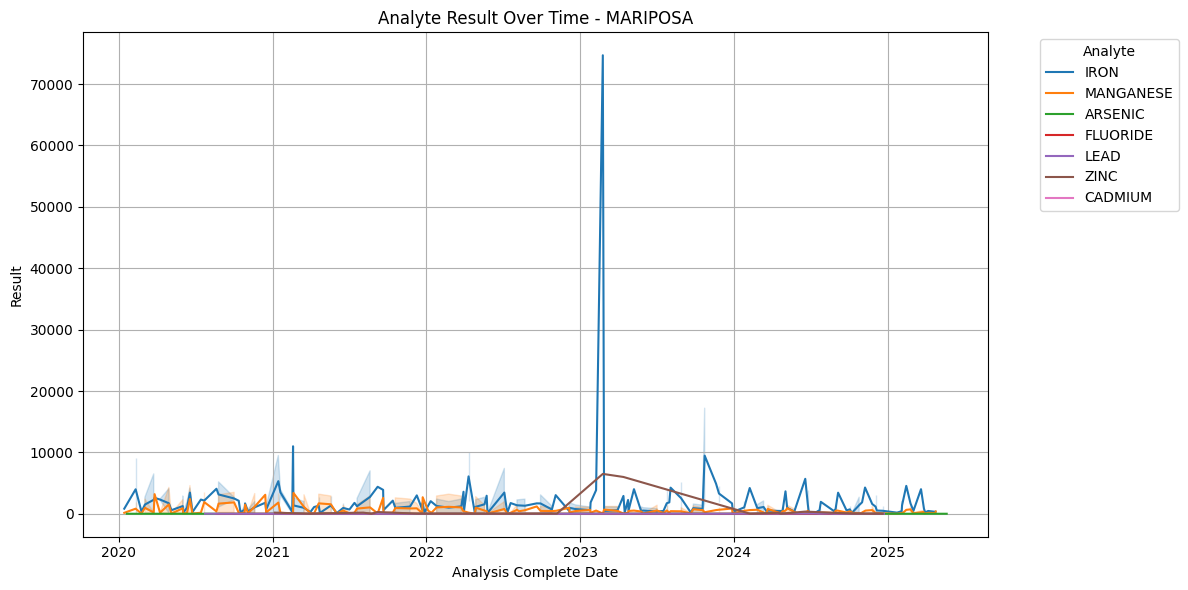

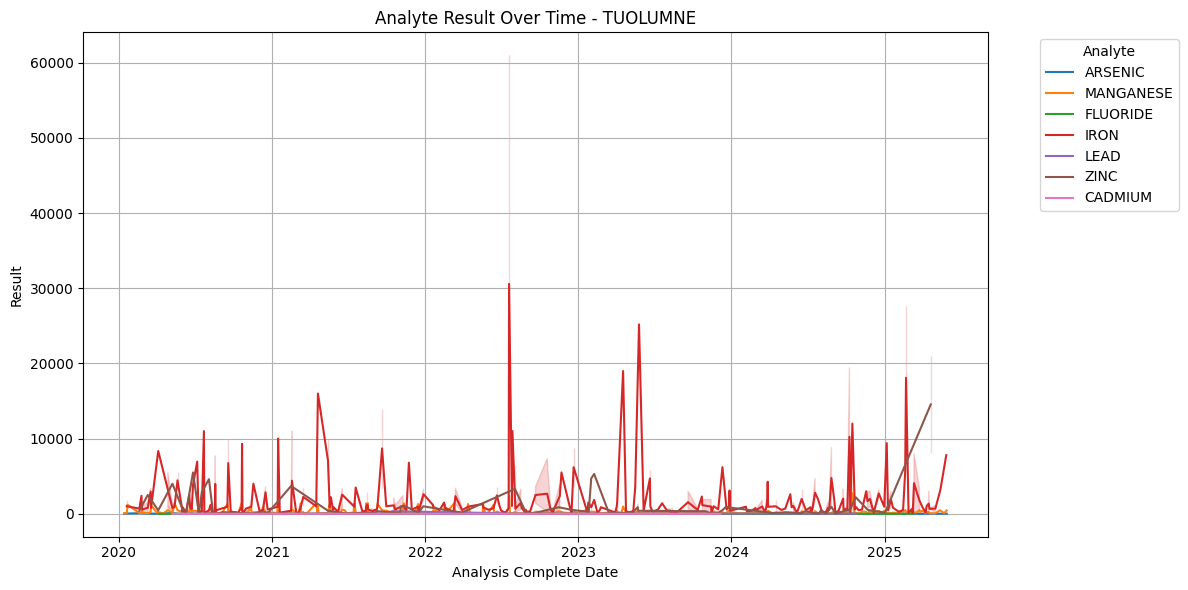

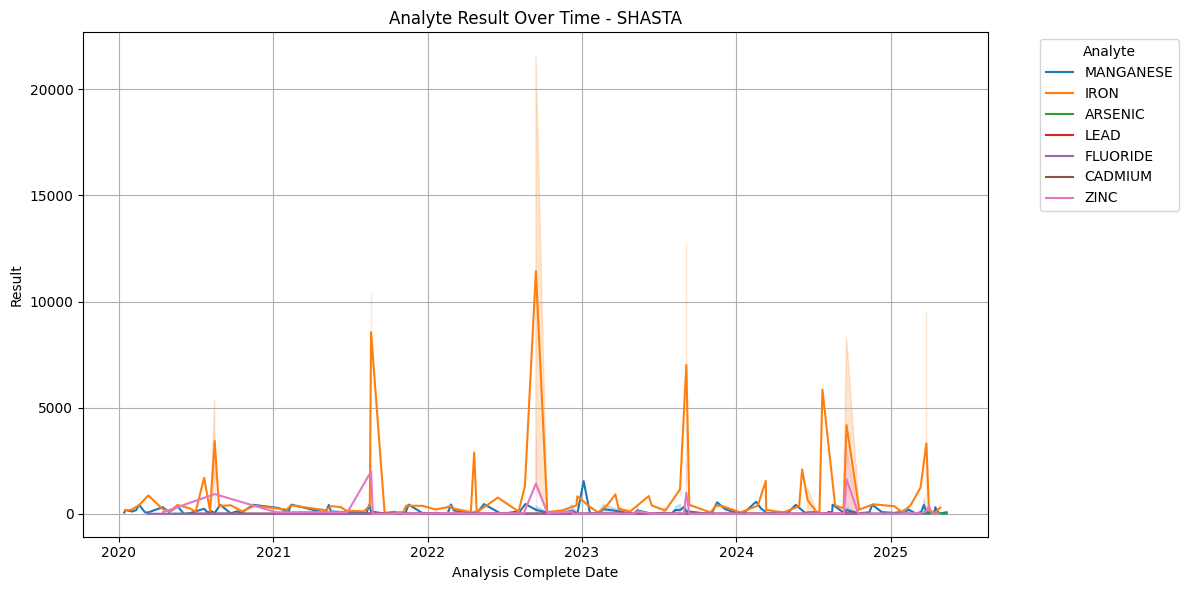

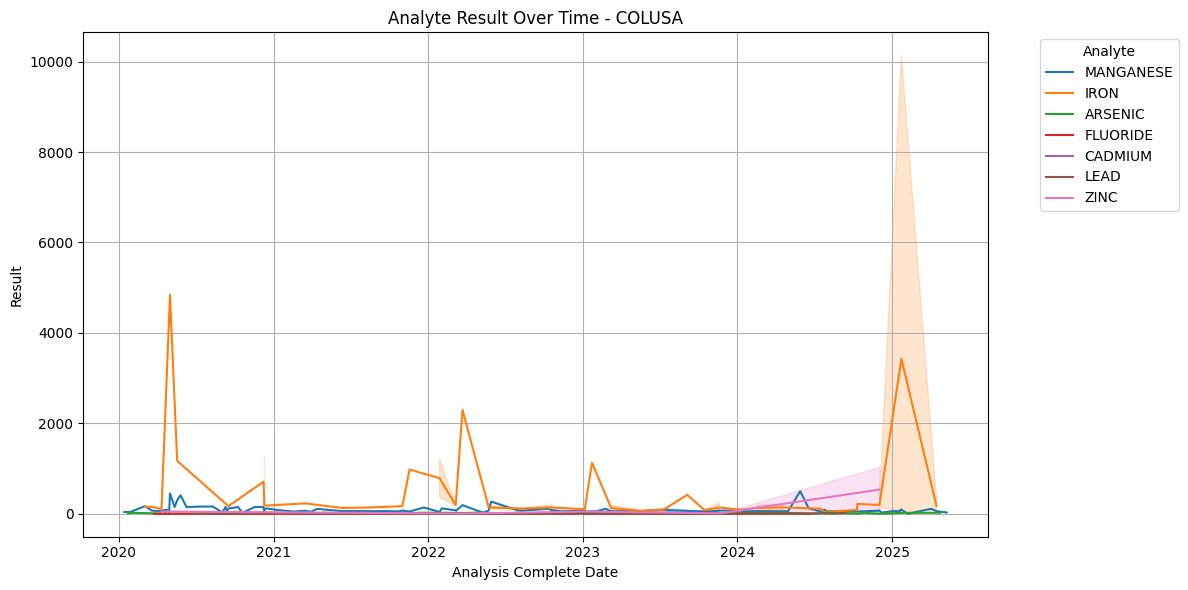

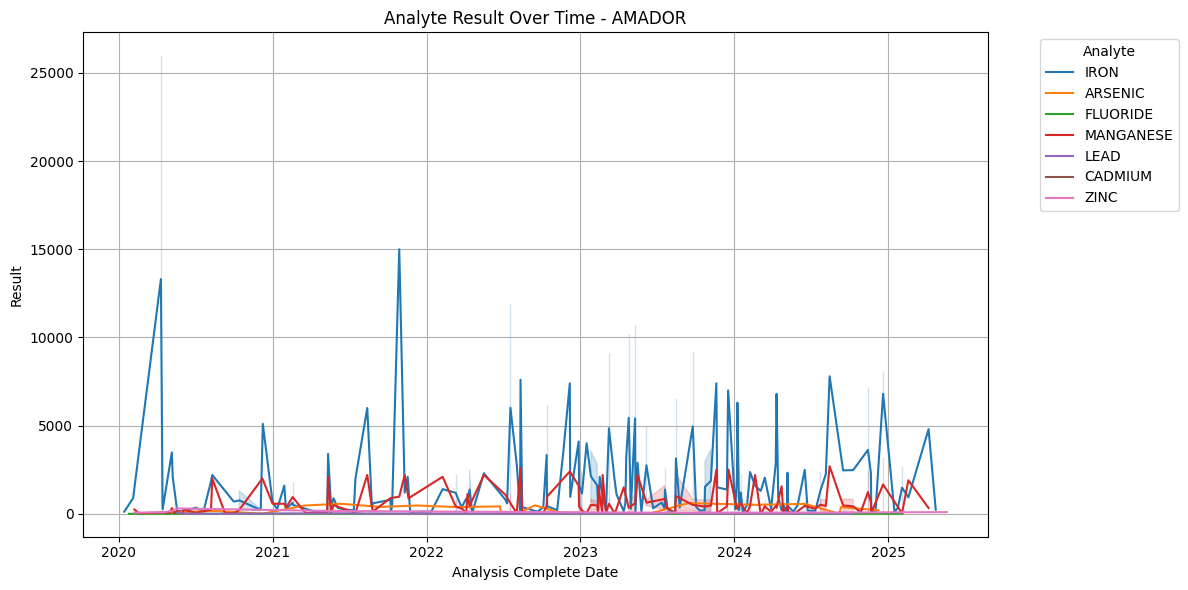

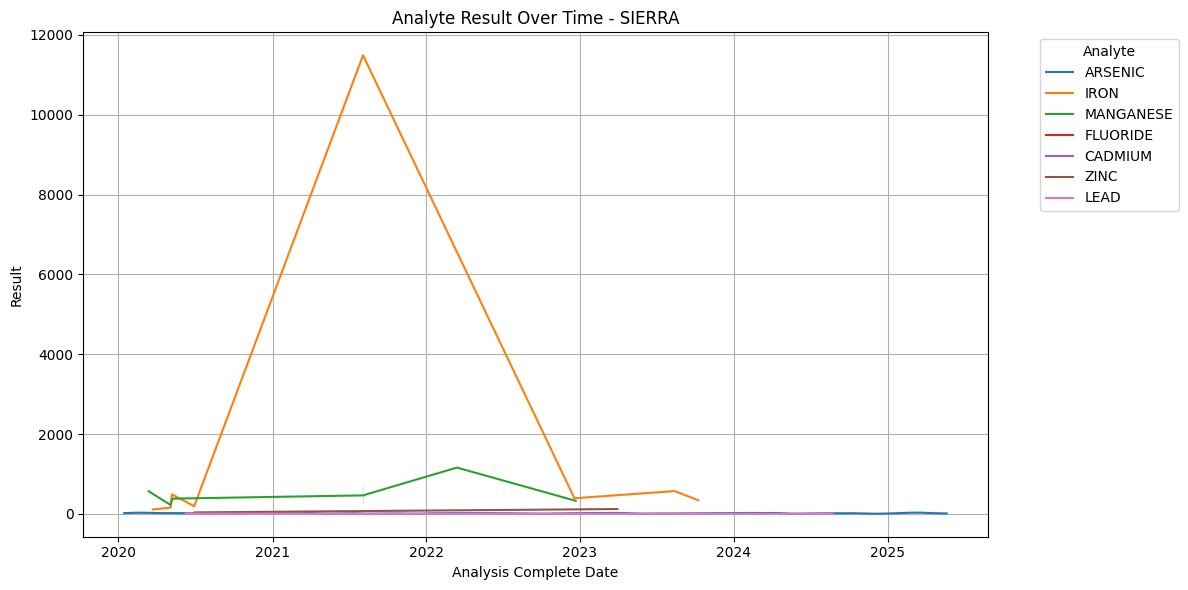

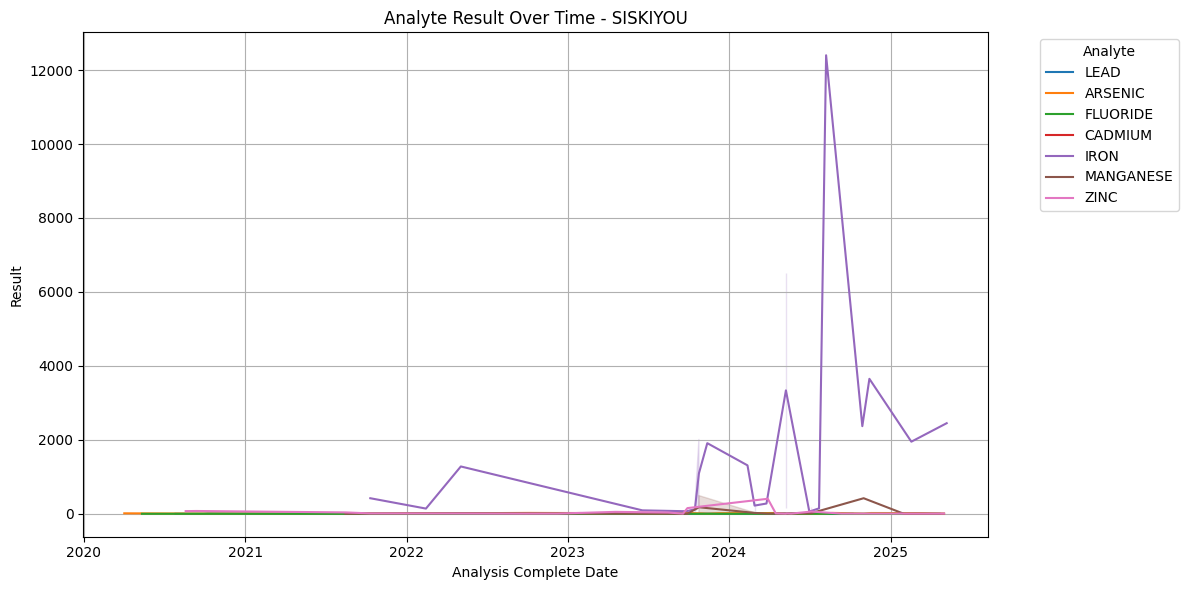

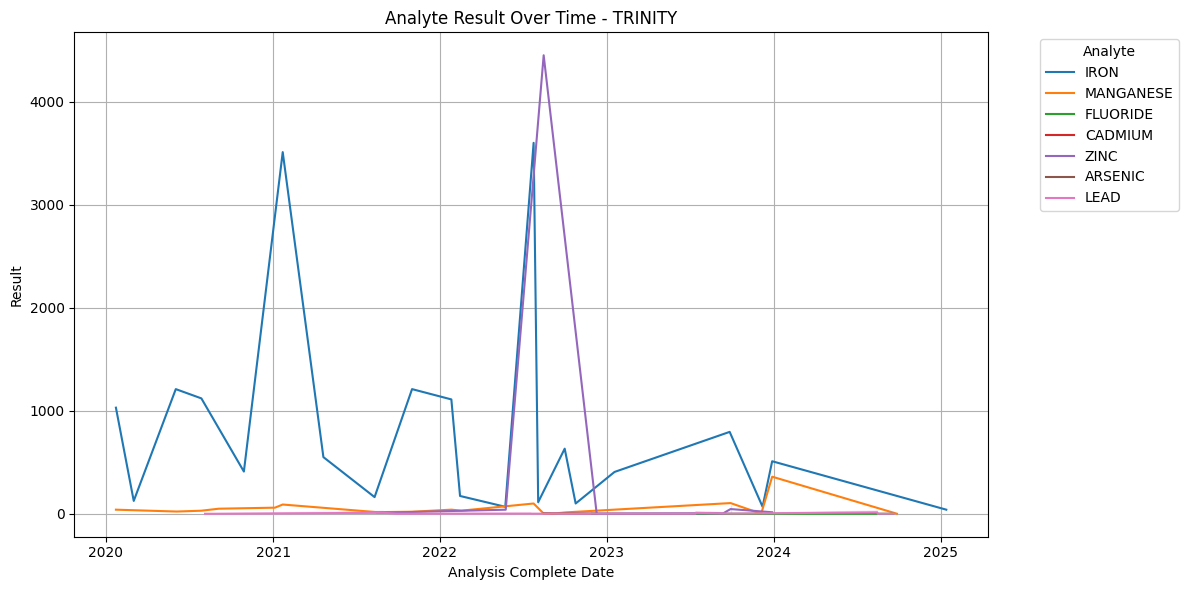

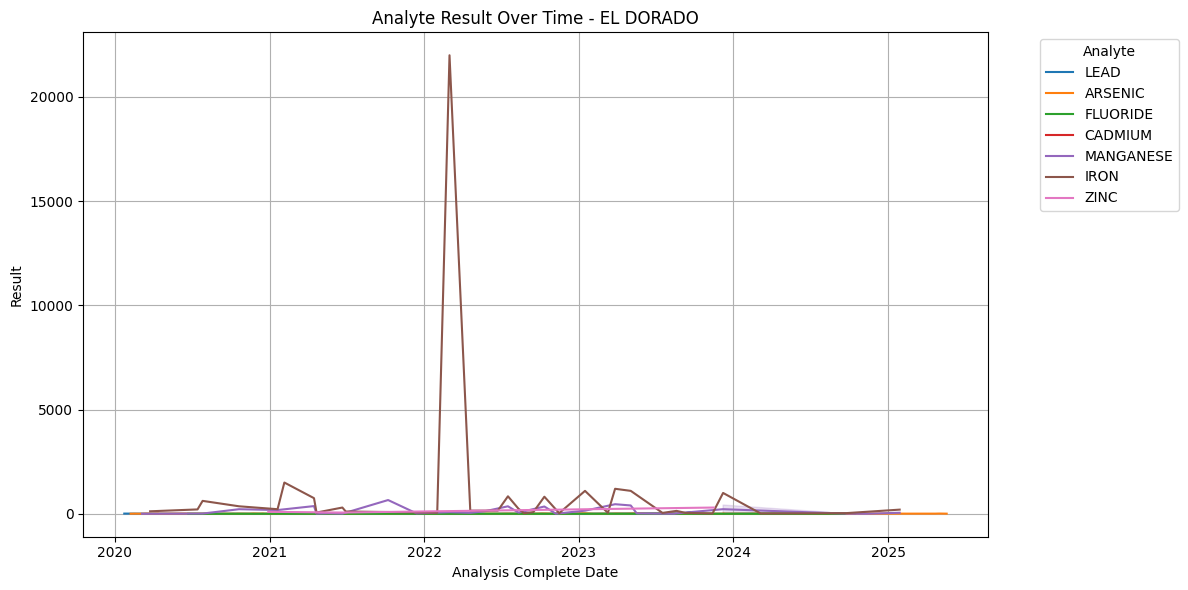

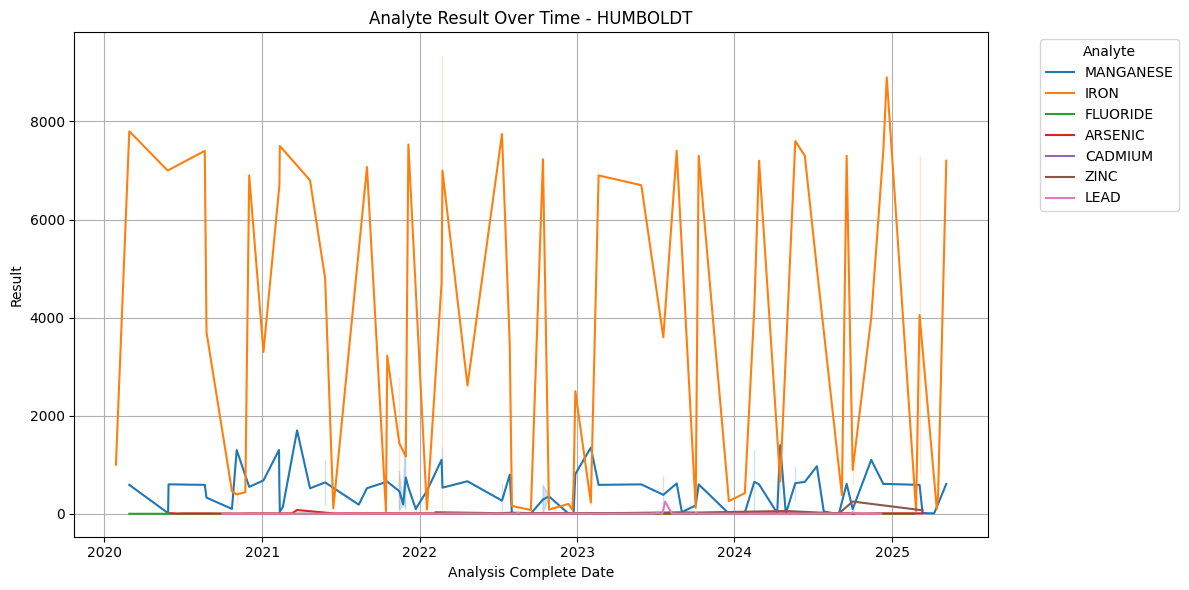

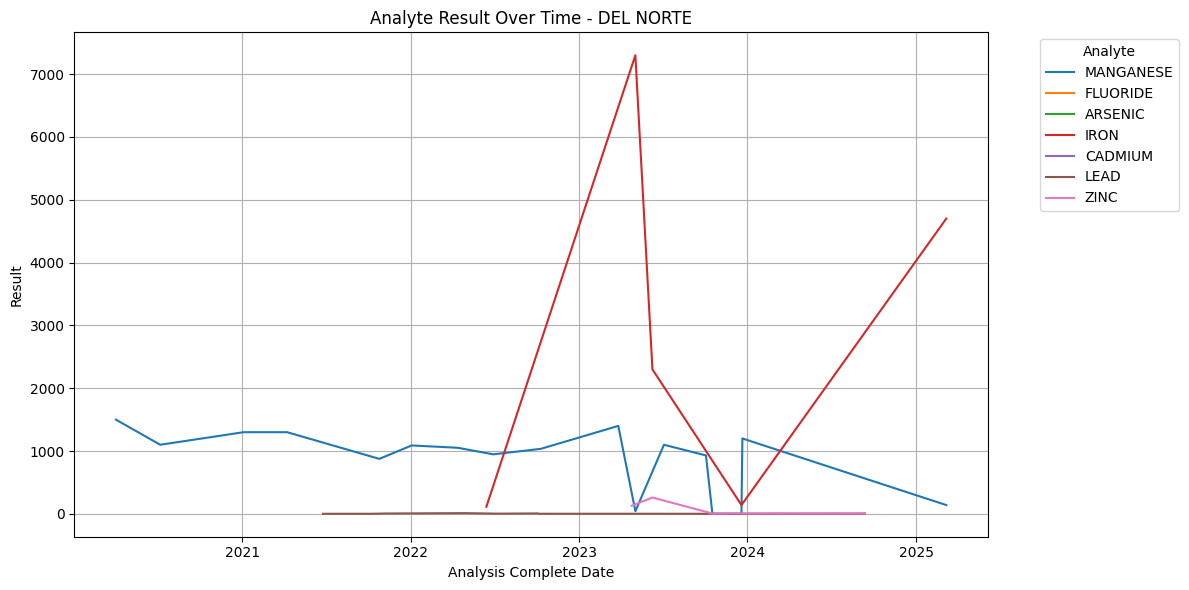

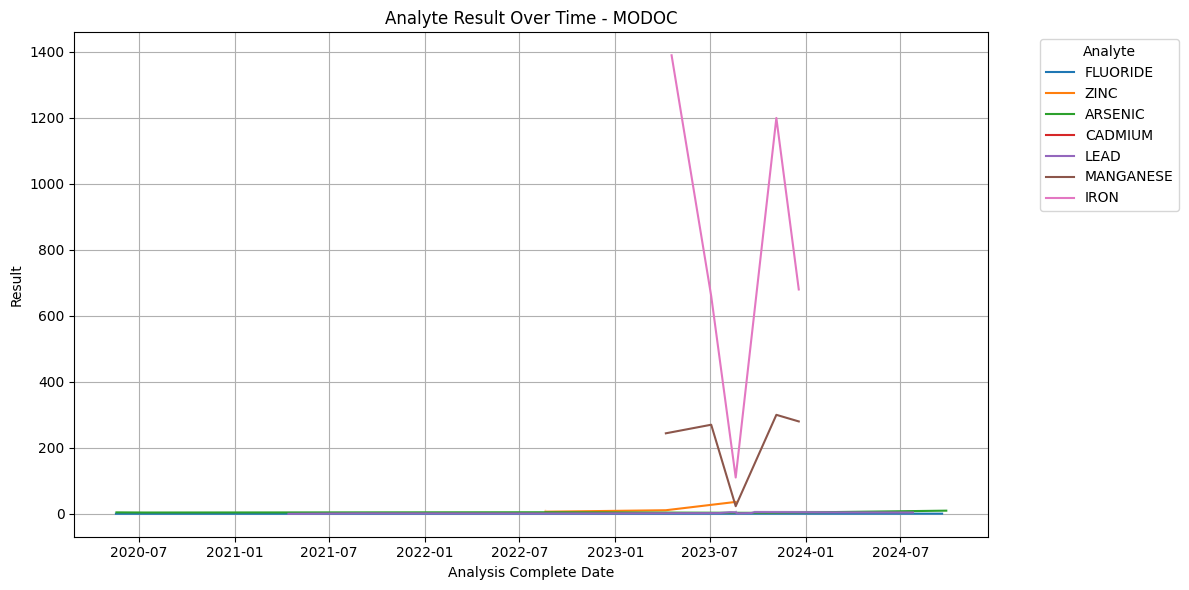

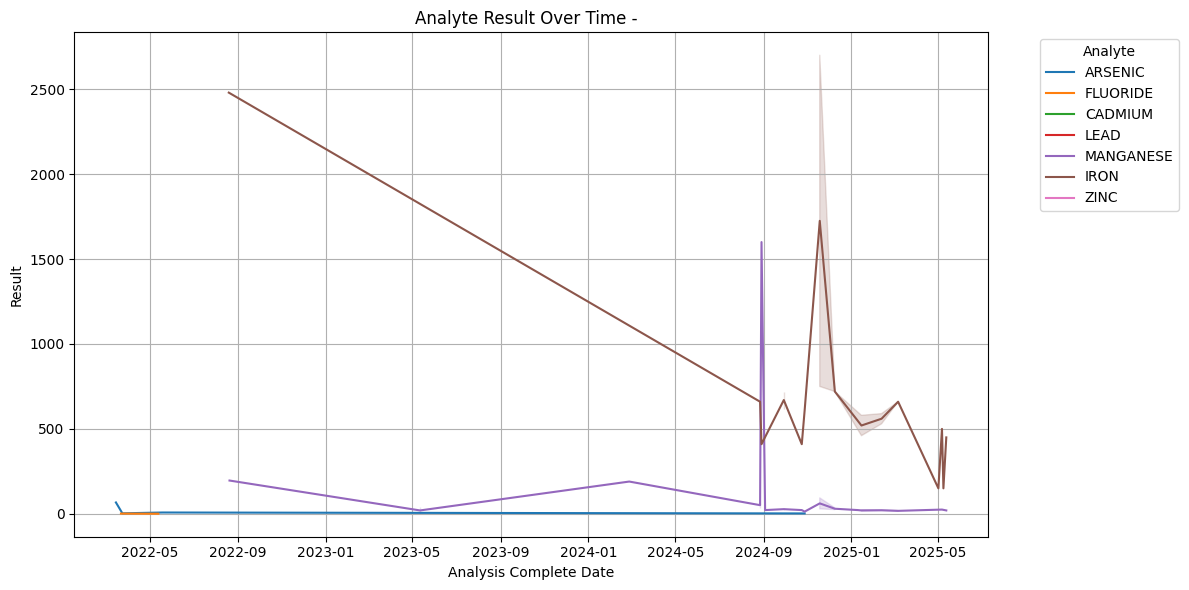

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Analysis Complete Date'] = pd.to_datetime(df['Analysis Complete Date'], errors='coerce')
df = df.dropna(subset=['Analysis Complete Date'])

county_col = 'County' if 'County' in df.columns else 'Location'

df = df.sort_values('Analysis Complete Date')

counties = df[county_col].unique()

for county in counties:
    county_df = df[df[county_col] == county]
    if county_df.empty:
        continue

    plt.figure(figsize=(12, 6))

    sns.lineplot(
        data=county_df,
        x='Analysis Complete Date',
        y='Result',
        hue='Analyte Name'
    )

    plt.title(f"Analyte Result Over Time - {county}")
    plt.xlabel("Analysis Complete Date")
    plt.ylabel("Result")
    plt.legend(title='Analyte', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [13]:
df = df.drop_duplicates()

critical_cols = []
for col in ['Analysis Complete Date', 'Analyte', 'Result']:
    if col in df.columns:
        critical_cols.append(col)
if critical_cols:
    df = df.dropna(subset=critical_cols)

if 'Analysis Complete Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Analysis Complete Date'])

if 'Result' in df.columns and df['Result'].dtype != object:
    df = df[df['Result'] >= 0]

print("Data shape after cleaning:", df.shape)
print("Remaining missing values:", df.isna().sum().to_dict())


Data shape after cleaning: (210670, 58)
Remaining missing values: {'Row #': 0, 'Regulating Agency': 0, 'Water System #': 0, 'System': 0, 'Status': 0, 'County': 0, 'Service Connections': 1919, 'Population TINWSYS': 0, 'Population R': 31439, 'Population NT': 178348, 'Population T': 190166, 'FED Type': 0, 'Facility ID': 0, 'Facility Name': 0, 'Facility Type': 0, 'Treatment': 0, 'Availability': 0, 'Facility Status': 0, 'Water Type Code': 0, 'Filtration Status': 0, 'D Source Flag': 0, 'Latitude': 16669, 'Longitude': 16669, 'Sampling Point ID': 0, 'Description': 0, 'Type': 0, 'SampPt Status': 0, 'Note 3': 0, 'Sample Input': 0, 'Lab ELAP Cert ID': 0, 'Lab Name': 0, 'Lab Sample ID': 0, 'Composite YN': 0, 'PS CODE': 0, 'Collection Address': 118655, 'Collection Date': 0, 'Collection Time': 1232, 'Sample Type': 0, 'Lab Receipt Date': 64606, 'Collector Name': 7, 'Sample Comments': 0, 'Result Input': 0, 'Analyte Name': 0, 'Analyte Code': 0, 'Analysis Start Date': 64678, 'Analysis Start Time': 65204

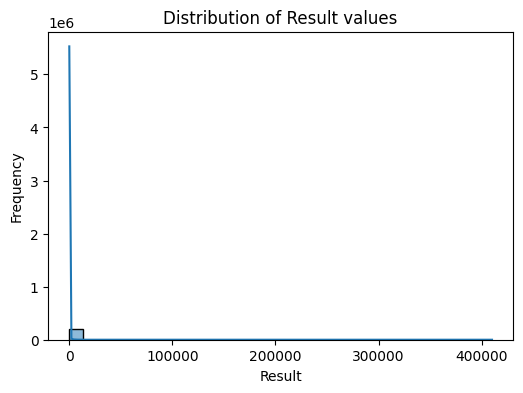

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.histplot(df['Result'], kde=True, bins=30)
plt.title("Distribution of Result values")
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

if 'Analyte' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Analyte', y='Result', data=df)
    plt.title("Result distribution by Analyte")
    plt.xticks(rotation=90)
    plt.ylabel("Result")
    plt.xlabel("Analyte")
    plt.show()


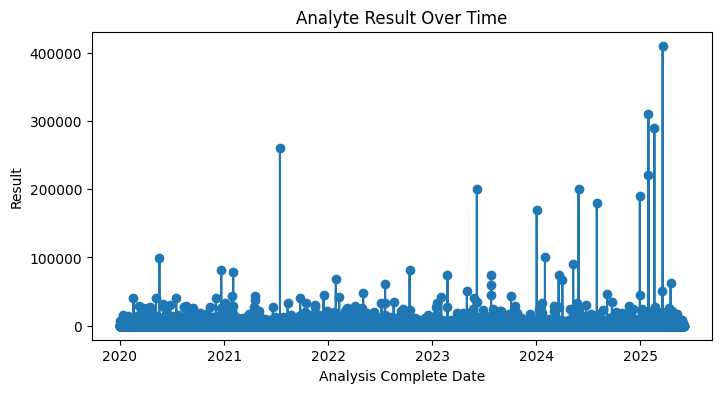

In [15]:

if 'Analysis Complete Date' in df.columns:
    df = df.sort_values('Analysis Complete Date')
    if 'Analyte' in df.columns:
        analytes = df['Analyte'].unique()
        n_analytes = len(analytes)
        plt.figure(figsize=(8, 3*n_analytes))
        for i, analyte in enumerate(analytes, start=1):
            plt.subplot(n_analytes, 1, i)
            subset = df[df['Analyte'] == analyte]
            plt.plot(subset['Analysis Complete Date'], subset['Result'], marker='o', linestyle='-')
            plt.title(f"{analyte} Trend Over Time")
            plt.xlabel("Analysis Complete Date")
            plt.ylabel("Result")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(8,4))
        plt.plot(df['Analysis Complete Date'], df['Result'], marker='o')
        plt.title("Analyte Result Over Time")
        plt.xlabel("Analysis Complete Date")
        plt.ylabel("Result")
        plt.show()


In [16]:
if 'Analyte' in df.columns:
    if 'Location' in df.columns or 'Station' in df.columns:
        loc_col = 'Location' if 'Location' in df.columns else 'Station'
        pivot_df = df.pivot_table(values='Result', index=['Analysis Complete Date', loc_col], columns='Analyte')
    else:
        pivot_df = df.pivot_table(values='Result', index='Analysis Complete Date', columns='Analyte')
    corr_matrix = pivot_df.corr()
    print("Correlation matrix between analytes:\n", corr_matrix)
    if corr_matrix.shape[0] <= 20:
        plt.figure(figsize=(6,5))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
        plt.title("Correlation between Analytes")
        plt.show()


In [17]:

if 'Analysis Complete Date' in df.columns:
    date_col = 'Analysis Complete Date'
elif 'Date' in df.columns:
    date_col = 'Date'
else:
    raise ValueError("No valid date column found.")

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df = df.dropna(subset=[date_col])  # remove rows with invalid dates

df = df.sort_values(date_col)
ts_data = df.set_index(date_col)['Result']

ts_monthly = ts_data.resample('MS').mean()


ts_monthly = ts_monthly.interpolate(method='linear').dropna()

print("Time series start:", ts_monthly.index.min(), " end:", ts_monthly.index.max())
print("Total time points after resampling:", len(ts_monthly))



Time series start: 2020-01-01 00:00:00  end: 2025-06-01 00:00:00
Total time points after resampling: 66


In [18]:
forecast_horizon = 12
if len(ts_monthly) > forecast_horizon:
    train_ts = ts_monthly.iloc[:-forecast_horizon]
    test_ts = ts_monthly.iloc[-forecast_horizon:]
else:
    train_ts = ts_monthly
    test_ts = pd.Series([], dtype=float)

print("Training periods:", len(train_ts), "Testing periods:", len(test_ts))
if not test_ts.empty:
    print("Training data range:", train_ts.index.min(), "to", train_ts.index.max())
    print("Testing data range:", test_ts.index.min(), "to", test_ts.index.max())


Training periods: 54 Testing periods: 12
Training data range: 2020-01-01 00:00:00 to 2024-06-01 00:00:00
Testing data range: 2024-07-01 00:00:00 to 2025-06-01 00:00:00


In [19]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0, 2)
pdq = [(x,y,z) for x in p for y in d for z in q]
seasonal_pdq = [(x,y,z, 12) for x in p for y in d for z in q]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for order in pdq:
    for s_order in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_ts, order=order, seasonal_order=s_order,
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = s_order
        except Exception as ex:
            continue

print(f"Best ARIMA order: {best_order}, Best seasonal order: {best_seasonal_order}, AIC: {best_aic:.2f}")

model = sm.tsa.statespace.SARIMAX(train_ts, order=best_order, seasonal_order=best_seasonal_order,
                                  enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print("\nModel summary:")
print(results.summary())


Best ARIMA order: (0, 1, 1), Best seasonal order: (1, 1, 1, 12), AIC: 270.53

Model summary:
                                     SARIMAX Results                                      
Dep. Variable:                             Result   No. Observations:                   54
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -131.264
Date:                            Wed, 06 Aug 2025   AIC                            270.528
Time:                                    04:51:20   BIC                            275.712
Sample:                                01-01-2020   HQIC                           272.069
                                     - 06-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000

In [20]:
if not test_ts.empty:
    forecast_steps = len(test_ts)
else:
    forecast_steps = 12

pred = results.get_forecast(steps=forecast_steps)
pred_mean = pred.predicted_mean
pred_conf = pred.conf_int()
if not test_ts.empty:
    pred_mean.index = test_ts.index
    pred_conf.index = test_ts.index

    from sklearn.metrics import mean_absolute_error, mean_squared_error
    mae = mean_absolute_error(test_ts, pred_mean)
    mse = mean_squared_error(test_ts, pred_mean)
    rmse = np.sqrt(mse)
    print(f"\nForecast evaluation on test data:")
    print(f"Mean Absolute Error: {mae:.3f}")
    print(f"Root Mean Squared Error: {rmse:.3f}")



Forecast evaluation on test data:
Mean Absolute Error: 65.360
Root Mean Squared Error: 90.590


NameError: name 'target_analyte' is not defined

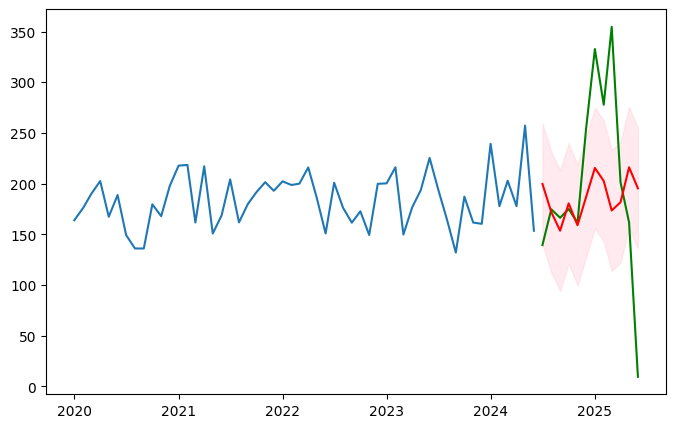

In [21]:
plt.figure(figsize=(8,5))
plt.plot(train_ts.index, train_ts.values, label='Training Data')
if not test_ts.empty:
    plt.plot(test_ts.index, test_ts.values, label='Actual Test Data', color='green')
    plt.plot(pred_mean.index, pred_mean.values, label='Forecast', color='red')
    plt.fill_between(pred_conf.index, pred_conf.iloc[:,0], pred_conf.iloc[:,1], color='pink', alpha=0.3, label='Confidence Interval')
else:
    forecast_index = pd.date_range(start=train_ts.index.max(), periods=forecast_steps+1, freq='M')[1:]
    plt.plot(train_ts.index, train_ts.values, label='Training Data')
    plt.plot(forecast_index, pred_mean.values, label='Forecast', color='red')
    plt.fill_between(forecast_index, pred_conf.iloc[:,0], pred_conf.iloc[:,1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title(f"Forecast for {target_analyte if target_analyte else 'Analyte'} over Time")
plt.xlabel("Date")
plt.ylabel("Result")
plt.legend()
plt.show()


NameError: name 'target_analyte' is not defined

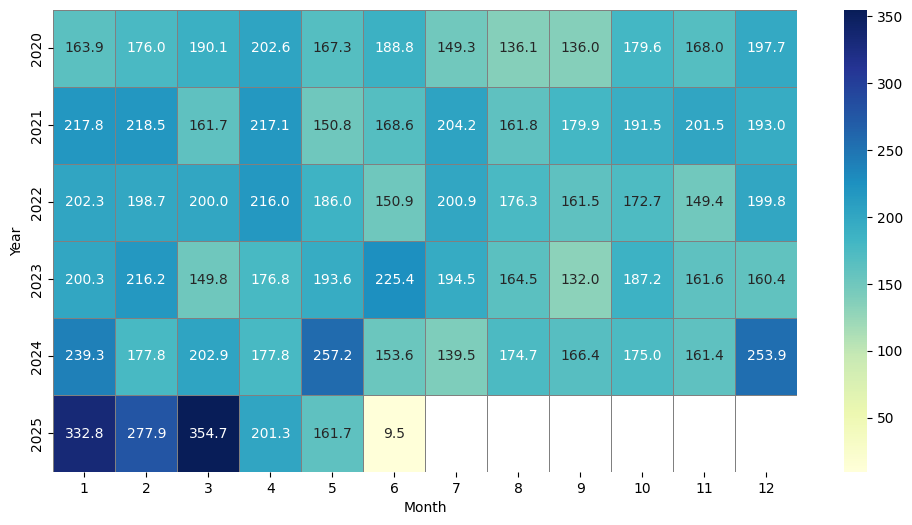

In [22]:
df_heatmap = ts_monthly.to_frame(name='Result')
df_heatmap['Year'] = df_heatmap.index.year
df_heatmap['Month'] = df_heatmap.index.month

heatmap_data = df_heatmap.pivot(index='Year', columns='Month', values='Result')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title(f"Monthly Average of {target_analyte} Over Years")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(ticks=np.arange(12) + 0.5, labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                              "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd

df['Analysis Complete Date'] = pd.to_datetime(df['Analysis Complete Date'], errors='coerce')
df = df.dropna(subset=['Analysis Complete Date', 'Result', 'Analyte Name', county_col])

county_col = 'County' if 'County' in df.columns else 'Location'
analyte_col = 'Analyte Name'

In [24]:
from prophet import Prophet

all_forecasts = []

groups = df.groupby([county_col, analyte_col])

for (county, analyte), grp in groups:
    grp = grp.sort_values('Analysis Complete Date')
    ts = grp[['Analysis Complete Date', 'Result']].rename(columns={
        'Analysis Complete Date': 'ds',
        'Result': 'y'
    })
    if len(ts) < 24:
        continue

    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(ts)

    future = model.make_future_dataframe(periods=10 * 12, freq='M')
    forecast = model.predict(future)

    forecast['county'] = county
    forecast['analyte Name'] = analyte
    all_forecasts.append(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'county', 'analyte Name']])


INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok0h9snw/ozexb0k_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok0h9snw/f8q3u9nr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68940', 'data', 'file=/tmp/tmpok0h9snw/ozexb0k_.json', 'init=/tmp/tmpok0h9snw/f8q3u9nr.json', 'output', 'file=/tmp/tmpok0h9snw/prophet_model1y7ap00h/prophet_model-20250806050208.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:02:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok0h9snw/9zxyb2sz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpok0h9snw/rw9jmw69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru